In [1]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from mlxtend.plotting import plot_pca_correlation_graph
import scipy.cluster.hierarchy as shc
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Step 2: Import data
#source: https://www.theglobaleconomy.com/rankings/wb_political_stability/
pol_stab = pd.read_csv(r"C:\Users\caspe\OneDrive\Documenten\Casper\OpenClassroom\Project 9\PoliticalStability_2000_2018.csv")
pol_stab = pol_stab[pol_stab.Year != 2000]
pol_stab = pol_stab[pol_stab.Year != 2018]
pol_stab.head()

,Country,Year,Political_Stability
1,Afghanistan,2002,-2.04
2,Afghanistan,2003,-2.20
3,Afghanistan,2004,-2.30
4,Afghanistan,2005,-2.07
5,Afghanistan,2006,-2.22


In [3]:
pol_stab_2017 = pol_stab[pol_stab.Year == 2017]
pol_stab_2017 = pol_stab_2017.reset_index()
pol_stab_2017.rename(columns={'Political_Stability': 'Pol Stab 2017'}, inplace=True)
pol_stab_2017.drop(['Year', 'index'], axis=1, inplace=True)
pol_stab_2017

,Country,Pol Stab 2017
0,Afghanistan,-2.80
1,Albanie,0.38
2,Algérie,-0.92
3,American Samoa,1.22
4,Andorra,1.42
...,...,...
193,Venezuela (République bolivarienne du),-1.25
194,Viet Nam,0.29
195,Yémen,-2.94
196,Zambie,0.15


In [4]:
avg_pol_stab_country = pol_stab.groupby("Country").mean().reset_index()
avg_pol_stab_country.drop('Year', axis=1, inplace=True)
avg_pol_stab_country.rename(columns={'Political_Stability': 'Avg Pol Stab 2002-2017'}, inplace=True)
avg_pol_stab_country

,Country,Avg Pol Stab 2002-2017
0,Afghanistan,-2.444375
1,Afrique du Sud,-0.094375
2,Albanie,-0.080625
3,Algérie,-1.230000
4,Allemagne,0.831250
...,...,...
193,Zimbabwe,-0.979375
194,Égypt,-1.026250
195,Émirats arabes unis,0.829375
196,États-Unis d'Amérique,0.393125


In [5]:
pol_stab_info = pol_stab_2017.merge(avg_pol_stab_country, on='Country')
pol_stab_info

,Country,Pol Stab 2017,Avg Pol Stab 2002-2017
0,Afghanistan,-2.80,-2.444375
1,Albanie,0.38,-0.080625
2,Algérie,-0.92,-1.230000
3,American Samoa,1.22,0.963571
4,Andorra,1.42,1.344375
...,...,...,...
193,Venezuela (République bolivarienne du),-1.25,-1.180000
194,Viet Nam,0.29,0.226250
195,Yémen,-2.94,-2.111875
196,Zambie,0.15,0.295625


In [6]:
pol_stab_info.dtypes

Country                    object
Pol Stab 2017             float64
Avg Pol Stab 2002-2017    float64
dtype: object

In [7]:
#source: https://www.fao.org/faostat/en/#data/OA
population = pd.read_excel(r"C:\Users\caspe\OneDrive\Documenten\Casper\OpenClassroom\Project 9\Population numbers.xlsx")
population.head()

,Pays,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,22600770.0,23680870.0,24726680.0,25654280.0,26433050.0,27100540.0,27722280.0,28394810.0,29185510.0,30117410.0,31161380.0,32269590.0,33370790.0,34413600.0,35383030.0,36296110.0
1,Afrique du Sud,46150910.0,46719200.0,47291610.0,47880600.0,48489460.0,49119760.0,49779470.0,50477010.0,51216960.0,52003760.0,52832660.0,53687120.0,54544190.0,55386370.0,56207650.0,57009760.0
2,Albanie,3126190.0,3118020.0,3104890.0,3086810.0,3063020.0,3034000.0,3002680.0,2973050.0,2948020.0,2928590.0,2914100.0,2903790.0,2896310.0,2890510.0,2886440.0,2884170.0
3,Algérie,31855110.0,32264160.0,32692160.0,33149720.0,33641000.0,34166970.0,34730610.0,35333880.0,35977460.0,36661450.0,37383900.0,38140130.0,38923690.0,39728030.0,40551390.0,41389190.0
4,Allemagne,81535120.0,81614380.0,81646470.0,81602740.0,81472230.0,81277830.0,81065750.0,80899960.0,80827000.0,80855630.0,80972630.0,81174370.0,81450380.0,81787410.0,82193770.0,82658410.0


In [8]:
population["% Pop change 2006-2017"] = ((population[2017]-population[2006])/population[2006])*100
population.rename({'Pays': 'Country', 2017 : 'Population 2017'}, axis=1, inplace=True)
population = population[population.Country != 'Soudan']
population

,Country,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Population 2017,% Pop change 2006-2017
0,Afghanistan,22600770.0,23680870.0,24726680.0,25654280.0,26433050.0,27100540.0,27722280.0,28394810.0,29185510.0,30117410.0,31161380.0,32269590.0,33370790.0,34413600.0,35383030.0,36296110.0,37.313363
1,Afrique du Sud,46150910.0,46719200.0,47291610.0,47880600.0,48489460.0,49119760.0,49779470.0,50477010.0,51216960.0,52003760.0,52832660.0,53687120.0,54544190.0,55386370.0,56207650.0,57009760.0,17.571447
2,Albanie,3126190.0,3118020.0,3104890.0,3086810.0,3063020.0,3034000.0,3002680.0,2973050.0,2948020.0,2928590.0,2914100.0,2903790.0,2896310.0,2890510.0,2886440.0,2884170.0,-5.839009
3,Algérie,31855110.0,32264160.0,32692160.0,33149720.0,33641000.0,34166970.0,34730610.0,35333880.0,35977460.0,36661450.0,37383900.0,38140130.0,38923690.0,39728030.0,40551390.0,41389190.0,23.031985
4,Allemagne,81535120.0,81614380.0,81646470.0,81602740.0,81472230.0,81277830.0,81065750.0,80899960.0,80827000.0,80855630.0,80972630.0,81174370.0,81450380.0,81787410.0,82193770.0,82658410.0,1.455932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,Venezuela (République bolivarienne du),25100410.0,25551620.0,25996590.0,26432450.0,26850190.0,27247610.0,27635830.0,28031010.0,28439940.0,28887870.0,29360840.0,29781040.0,30042970.0,30081830.0,29851260.0,29402480.0,9.505668
230,Viet Nam,81534410.0,82301660.0,83062820.0,83832660.0,84617540.0,85419590.0,86243410.0,87092250.0,87967650.0,88871380.0,89801930.0,90752590.0,91713850.0,92677080.0,93640420.0,94600650.0,11.797920
231,Yémen,18443690.0,18985000.0,19540100.0,20107410.0,20687650.0,21282520.0,21892150.0,22516460.0,23154860.0,23807590.0,24473180.0,25147110.0,25823490.0,26497890.0,27168210.0,27834820.0,34.548003
232,Zambie,10971700.0,11256740.0,11550640.0,11856250.0,12173510.0,12502960.0,12848530.0,13215140.0,13605980.0,14023200.0,14465150.0,14926540.0,15399790.0,15879360.0,16363460.0,16853600.0,38.444869


In [9]:
population_info = population[["Country", 'Population 2017', "% Pop change 2006-2017"]]
population_info

,Country,Population 2017,% Pop change 2006-2017
0,Afghanistan,36296110.0,37.313363
1,Afrique du Sud,57009760.0,17.571447
2,Albanie,2884170.0,-5.839009
3,Algérie,41389190.0,23.031985
4,Allemagne,82658410.0,1.455932
...,...,...,...
229,Venezuela (République bolivarienne du),29402480.0,9.505668
230,Viet Nam,94600650.0,11.797920
231,Yémen,27834820.0,34.548003
232,Zambie,16853600.0,38.444869


In [10]:
population_info.dtypes

Country                    object
Population 2017           float64
% Pop change 2006-2017    float64
dtype: object

In [11]:
#source: https://www.fao.org/faostat/en/#data/PE
taux_change = pd.read_csv(r"C:\Users\caspe\OneDrive\Documenten\Casper\OpenClassroom\Project 9\taux de change FAOSTAT_data_1-2022.csv")
taux_change.rename({'Zone': 'Country', 'Valeur': 'Avg Xchange rate to $'}, axis=1, inplace=True)
taux_change.head()

,Country,Code de devise ISO (FAO),Devise,Année,Avg Xchange rate to $
0,Afghanistan,AFN,Afghani,2017,68.026904
1,Afrique du Sud,ZAR,Rand,2017,13.333781
2,Albanie,ALL,Lek,2017,119.099667
3,Algérie,DZD,Algerian Dinar,2017,110.973017
4,Allemagne,EUR,Euro,2017,0.885206


In [12]:
xchange_rate = taux_change[['Country', 'Avg Xchange rate to $']]
xchange_rate

,Country,Avg Xchange rate to $
0,Afghanistan,68.026904
1,Afrique du Sud,13.333781
2,Albanie,119.099667
3,Algérie,110.973017
4,Allemagne,0.885206
...,...,...
205,Venezuela,607.688224
206,Viet Nam,22370.086670
207,Yémen,250.250000
208,Zambie,9.519501


In [13]:
xchange_rate.dtypes

Country                   object
Avg Xchange rate to $    float64
dtype: object

In [14]:
#source: https://www.worldometers.info/gdp/gdp-by-country/
gdp = pd.read_excel(r"C:\Users\caspe\OneDrive\Documenten\Casper\OpenClassroom\Project 9\GDP 2017(1).xlsx")
gdp.head()

,Country,Unnamed: 1,Unnamed: 2,"GDP (nominal, 2017)",GDP per capita
0,Afghanistan,"$19,543,976,895",$538,19543976895,538
1,Albanie,"$13,038,538,300","$4,521",13038538300,4521
2,Algérie,"$167,555,280,113","$4,048",167555280113,4048
3,American Samoa,"$634,000,000","$11,399",634000000,11399
4,Andorra,"$3,012,914,131","$39,128",3012914131,39128


In [15]:
gdp_info = gdp[['Country', 'GDP (nominal, 2017)', 'GDP per capita']]
gdp_info

,Country,"GDP (nominal, 2017)",GDP per capita
0,Afghanistan,19543976895,538
1,Albanie,13038538300,4521
2,Algérie,167555280113,4048
3,American Samoa,634000000,11399
4,Andorra,3012914131,39128
...,...,...,...
185,Vanuatu,862879789,3022
186,Viet Nam,223779865815,2366
187,Yémen,31267675216,1123
188,Zambie,25868142073,1535


In [16]:
gdp_info.dtypes

Country                object
GDP (nominal, 2017)     int64
GDP per capita          int64
dtype: object

In [17]:
#source: https://www.caribbeansignal.com/2019/11/28/countries-with-the-largest-number-of-kfc-restaurants-per-100000-people-by-country/
kfc = pd.read_excel(r"C:\Users\caspe\OneDrive\Documenten\Casper\OpenClassroom\Project 9\KFC per country.xlsx")
kfc.head()

,Country,# of KFC Stores
0,Albanie,2
1,Angola,9
2,Antigua-et-Barbuda,2
3,Argentine,10
4,Arménie,9


In [18]:
kfc.dtypes

Country             object
# of KFC Stores      int64
dtype: object

In [19]:
# source: https://www.atlasbig.com/en-us/countries-mcdonalds-shops
mcdo = pd.read_excel(r"C:\Users\caspe\OneDrive\Documenten\Casper\OpenClassroom\Project 9\McDo per country.xlsx")
mcdo.rename({'Number of Restaurants': '# of McDonalds Stores'}, axis=1, inplace=True)
mcdo.head()

,Country,# of McDonalds Stores
0,États-Unis d'Amérique,14146
1,Japon,2975
2,"Chine, continentale",2391
3,Allemagne,1476
4,Canada,1450


In [20]:
mcdo.dtypes

Country                  object
# of McDonalds Stores     int64
dtype: object

In [21]:
###source: https://www.freemaptools.com/how-far-is-it-between.htm, Origin point = Paris
distance = pd.read_excel(r"C:\Users\caspe\OneDrive\Documenten\Casper\OpenClassroom\Project 9\Distance.xlsx")
distance.head()

,Country,Distance (km)
0,Afghanistan,5583.528
1,Afrique du Sud,9063.963
2,Albanie,1635.822
3,Algérie,2316.022
4,Allemagne,632.765


In [22]:
distance.dtypes

Country           object
Distance (km)    float64
dtype: object

In [23]:
#source: provided by company
info_alimentaire = pd.read_csv(r"C:\Users\caspe\OneDrive\Documenten\Casper\OpenClassroom\Project 9\DisponibiliteAlimentaire_2017.csv")
info_alimentaire.rename({'Zone': 'Country'}, axis=1, inplace=True)
info_alimentaire.drop(['Année'], axis=1, inplace=True)
info_alimentaire.head()

,Country,Élément,Produit,Unité,Valeur
0,Afghanistan,Production,Blé et produits,Milliers de tonnes,4281.0
1,Afghanistan,Importations - Quantité,Blé et produits,Milliers de tonnes,2302.0
2,Afghanistan,Variation de stock,Blé et produits,Milliers de tonnes,-119.0
3,Afghanistan,Exportations - Quantité,Blé et produits,Milliers de tonnes,0.0
4,Afghanistan,Disponibilité intérieure,Blé et produits,Milliers de tonnes,6701.0


In [24]:
info_alimentaire.Produit.unique()

array(['Blé et produits', 'Riz et produits', 'Orge et produits',
       'Maïs et produits', 'Seigle et produits', 'Avoine',
       'Millet et produits', 'Sorgho et produits', 'Céréales, Autres',
       'Pommes de Terre et produits', 'Ignames', 'Racines nda',
       'Sucre, canne', 'Sucre, betterave', 'Sucre Eq Brut',
       'Edulcorants Autres', 'Miel', 'Haricots', 'Pois',
       'Légumineuses Autres et produits', 'Noix et produits', 'Soja',
       'Arachides Decortiquees', 'Graines de tournesol',
       'Graines Colza/Moutarde', 'Graines de coton', 'Coco (Incl Coprah)',
       'Sésame', 'Olives', 'Plantes Oleiferes, Autre', 'Huile de Soja',
       "Huile d'Arachide", 'Huile de Tournesol',
       'Huile de Colza&Moutarde', 'Huile Graines de Coton',
       'Huile de Palmistes', 'Huile de Palme', 'Huile de Coco',
       'Huile de Sésame', "Huile d'Olive", 'Huile de Son de Riz',
       'Huile de Germe de Maïs', 'Huil Plantes Oleif Autr',
       'Tomates et produits', 'Oignons', 'Légumes, 

In [25]:
info_alimentaire = info_alimentaire[info_alimentaire.Produit == 'Viande de Volailles']
info_alimentaire['Valeur (tonnes)'] = info_alimentaire['Valeur']*1000
info_alimentaire.drop(['Produit', 'Unité', 'Valeur'], axis=1, inplace=True)
info_alimentaire

,Country,Élément,Valeur (tonnes)
651,Afghanistan,Production,28000.0
652,Afghanistan,Importations - Quantité,29000.0
653,Afghanistan,Variation de stock,0.0
654,Afghanistan,Disponibilité intérieure,57000.0
655,Afghanistan,Pertes,2000.0
...,...,...,...
176396,Zimbabwe,Nourriture,67000.0
176397,Zimbabwe,Disponibilité alimentaire en quantité (kg/pers...,4680.0
176398,Zimbabwe,Disponibilité alimentaire (Kcal/personne/jour),16000.0
176399,Zimbabwe,Disponibilité de protéines en quantité (g/pers...,1590.0


In [26]:
info_alimentaire.Élément.unique()

array(['Production', 'Importations - Quantité', 'Variation de stock',
       'Disponibilité intérieure', 'Pertes', 'Résidus', 'Nourriture',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Exportations - Quantité', 'Alimentation pour touristes',
       'Traitement', 'Autres utilisations (non alimentaire)',
       'Aliments pour animaux', 'Semences'], dtype=object)

In [27]:
elements = ['Production', 'Importations - Quantité', 'Exportations - Quantité']
rel_info = info_alimentaire.loc[info_alimentaire['Élément'].isin(elements)]
rel_info

,Country,Élément,Valeur (tonnes)
651,Afghanistan,Production,28000.0
652,Afghanistan,Importations - Quantité,29000.0
1704,Afrique du Sud,Production,1667000.0
1705,Afrique du Sud,Importations - Quantité,514000.0
1707,Afrique du Sud,Exportations - Quantité,63000.0
...,...,...,...
175361,Zambie,Production,49000.0
175362,Zambie,Importations - Quantité,12000.0
175364,Zambie,Exportations - Quantité,1000.0
176388,Zimbabwe,Production,69000.0


In [28]:
rel_info_pt = rel_info.pivot_table(index=['Country'], columns=["Élément"], values='Valeur (tonnes)', fill_value=0)
rel_info_pt.reset_index(inplace=True)
rel_info_pt.rename(columns={'Exportations - Quantité': 'Viande Volaille, Export de Country vers monde (tonnes)',\
                            'Importations - Quantité': 'Viande Volaille, Import de monde vers Country (tonnes)',\
                           'Production': 'Production (tonnes)'},inplace=True)
rel_info_pt

Élément,Country,"Viande Volaille, Export de Country vers monde (tonnes)","Viande Volaille, Import de monde vers Country (tonnes)",Production (tonnes)
0,Afghanistan,0,29000,28000
1,Afrique du Sud,63000,514000,1667000
2,Albanie,0,38000,13000
3,Algérie,0,2000,275000
4,Allemagne,646000,842000,1514000
...,...,...,...,...
165,Émirats arabes unis,94000,433000,48000
166,Équateur,0,0,340000
167,États-Unis d'Amérique,3692000,123000,21914000
168,Éthiopie,0,1000,14000


In [29]:
rel_info_pt.dtypes

Élément
Country                                                   object
Viande Volaille, Export de Country vers monde (tonnes)     int64
Viande Volaille, Import de monde vers Country (tonnes)     int64
Production (tonnes)                                        int64
dtype: object

In [30]:
#source: https://www.fao.org/faostat/en/#data/TM
chicken_trade = pd.read_csv(r"C:\Users\caspe\OneDrive\Documenten\Casper\OpenClassroom\Project 9\Comm Poulet FAOSTAT_data_1-2022.csv")
chicken_trade.rename({'Pays partenaires': 'Country'}, axis=1, inplace=True)
chicken_trade = chicken_trade[chicken_trade.Unité == 'tonnes']
chicken_trade = chicken_trade[chicken_trade.Produit != 'Poulets']
chicken_trade

,Pays déclarants,Country,élément,Produit,Année,Valeur,Unité
0,France,Afghanistan,Exportations - Quantité,"Viande, volaille",2017,244,tonnes
2,France,Afrique du Sud,Exportations - Quantité,"Viande, poulet en boîte",2017,1,tonnes
7,France,Albanie,Exportations - Quantité,"Viande, poulet en boîte",2017,10,tonnes
9,France,Albanie,Exportations - Quantité,"Viande, volaille",2017,78,tonnes
14,France,Algérie,Exportations - Quantité,"Viande, poulet en boîte",2017,46,tonnes
...,...,...,...,...,...,...,...
646,France,Vanuatu,Exportations - Quantité,"Viande, poulet en boîte",2017,0,tonnes
648,France,Venezuela,Exportations - Quantité,"Viande, poulet en boîte",2017,0,tonnes
653,France,Viet Nam,Exportations - Quantité,"Viande, poulet en boîte",2017,34,tonnes
655,France,Viet Nam,Exportations - Quantité,"Viande, volaille",2017,1202,tonnes


In [31]:
export_info = chicken_trade[['Country', 'Produit', 'Valeur']]
export_info

,Country,Produit,Valeur
0,Afghanistan,"Viande, volaille",244
2,Afrique du Sud,"Viande, poulet en boîte",1
7,Albanie,"Viande, poulet en boîte",10
9,Albanie,"Viande, volaille",78
14,Algérie,"Viande, poulet en boîte",46
...,...,...,...
646,Vanuatu,"Viande, poulet en boîte",0
648,Venezuela,"Viande, poulet en boîte",0
653,Viet Nam,"Viande, poulet en boîte",34
655,Viet Nam,"Viande, volaille",1202


In [32]:
export_info_pt = export_info.pivot_table(index=['Country'], columns=["Produit"], values='Valeur', fill_value=0)
export_info_pt.reset_index(inplace=True)
export_info_pt.rename(columns={'Viande, poulet en boîte': 'Poulet (boîte), export de France vers Country (tonnes)',\
                            'Viande, volaille': 'Viande volaille, export de France vers Country (tonnes)'},inplace=True)
export_info_pt

Produit,Country,"Poulet (boîte), export de France vers Country (tonnes)","Viande volaille, export de France vers Country (tonnes)"
0,Afghanistan,0,244
1,Afrique du Sud,1,0
2,Albanie,10,78
3,Algérie,46,0
4,Allemagne,1377,18920
...,...,...,...
129,Yémen,0,4721
130,Égypte,10,6623
131,Émirats arabes unis,278,7557
132,États-Unis d'Amérique,0,0


In [33]:
export_info_pt.dtypes

Produit
Country                                                    object
Poulet (boîte), export de France vers Country (tonnes)      int64
Viande volaille, export de France vers Country (tonnes)     int64
dtype: object

In [34]:
###Step 3: Merge DFs
merge_dfs = export_info_pt.merge(kfc, on='Country', how='outer').merge(mcdo, on='Country', how='outer')\
.merge(gdp_info, on='Country', how='outer').merge(population_info, on='Country', how='outer').merge(xchange_rate, on='Country', how='outer')\
.merge(pol_stab_info, on='Country', how='outer').merge(distance, on='Country', how='outer').fillna(0)
merge_dfs

,Country,"Poulet (boîte), export de France vers Country (tonnes)","Viande volaille, export de France vers Country (tonnes)",# of KFC Stores,# of McDonalds Stores,"GDP (nominal, 2017)",GDP per capita,Population 2017,% Pop change 2006-2017,Avg Xchange rate to $,Pol Stab 2017,Avg Pol Stab 2002-2017,Distance (km)
0,Afghanistan,0.0,244.0,0.0,0.0,1.954398e+10,538.0,36296110.0,37.313363,68.026904,-2.80,-2.444375,5583.528
1,Afrique du Sud,1.0,0.0,914.0,252.0,3.488716e+11,6120.0,57009760.0,17.571447,13.333781,-0.28,-0.094375,9063.963
2,Albanie,10.0,78.0,2.0,0.0,1.303854e+10,4521.0,2884170.0,-5.839009,119.099667,0.38,-0.080625,1635.822
3,Algérie,46.0,0.0,0.0,0.0,1.675553e+11,4048.0,41389190.0,23.031985,110.973017,-0.92,-1.230000,2316.022
4,Allemagne,1377.0,18920.0,173.0,1476.0,3.693204e+12,44680.0,82658410.0,1.455932,0.885206,0.59,0.831250,632.765
...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,Micronésie (État fédéré de),0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000,0.000000,1.18,1.088000,0.000
284,Papua New Guinée,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000,0.000000,-0.70,-0.640000,0.000
285,Soudan Sud,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000,0.000000,-2.45,-2.031429,0.000
286,Syrian Arab Republic,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000,0.000000,-2.62,-1.332500,0.000


In [35]:
full_data = rel_info_pt.merge(merge_dfs, on='Country', how='left').fillna(0)
full_data

,Country,"Viande Volaille, Export de Country vers monde (tonnes)","Viande Volaille, Import de monde vers Country (tonnes)",Production (tonnes),"Poulet (boîte), export de France vers Country (tonnes)","Viande volaille, export de France vers Country (tonnes)",# of KFC Stores,# of McDonalds Stores,"GDP (nominal, 2017)",GDP per capita,Population 2017,% Pop change 2006-2017,Avg Xchange rate to $,Pol Stab 2017,Avg Pol Stab 2002-2017,Distance (km)
0,Afghanistan,0,29000,28000,0.0,244.0,0.0,0.0,1.954398e+10,538.0,36296110.0,37.313363,68.026904,-2.80,-2.444375,5583.528
1,Afrique du Sud,63000,514000,1667000,1.0,0.0,914.0,252.0,3.488716e+11,6120.0,57009760.0,17.571447,13.333781,-0.28,-0.094375,9063.963
2,Albanie,0,38000,13000,10.0,78.0,2.0,0.0,1.303854e+10,4521.0,2884170.0,-5.839009,119.099667,0.38,-0.080625,1635.822
3,Algérie,0,2000,275000,46.0,0.0,0.0,0.0,1.675553e+11,4048.0,41389190.0,23.031985,110.973017,-0.92,-1.230000,2316.022
4,Allemagne,646000,842000,1514000,1377.0,18920.0,173.0,1476.0,3.693204e+12,44680.0,82658410.0,1.455932,0.885206,0.59,0.831250,632.765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Émirats arabes unis,94000,433000,48000,278.0,7557.0,151.0,165.0,3.825751e+11,40325.0,9487200.0,78.998032,3.672500,0.62,0.829375,5249.794
166,Équateur,0,0,340000,0.0,0.0,144.0,0.0,1.042959e+11,6214.0,16785360.0,19.389048,1.000000,0.00,0.000000,9515.114
167,États-Unis d'Amérique,3692000,123000,21914000,0.0,0.0,4062.0,14146.0,1.948539e+13,59939.0,325084760.0,9.177151,1.000000,0.34,0.393125,7520.141
168,Éthiopie,0,1000,14000,20.0,42.0,0.0,0.0,0.000000e+00,0.0,106399920.0,35.559932,23.866104,-1.68,-1.550000,5660.203


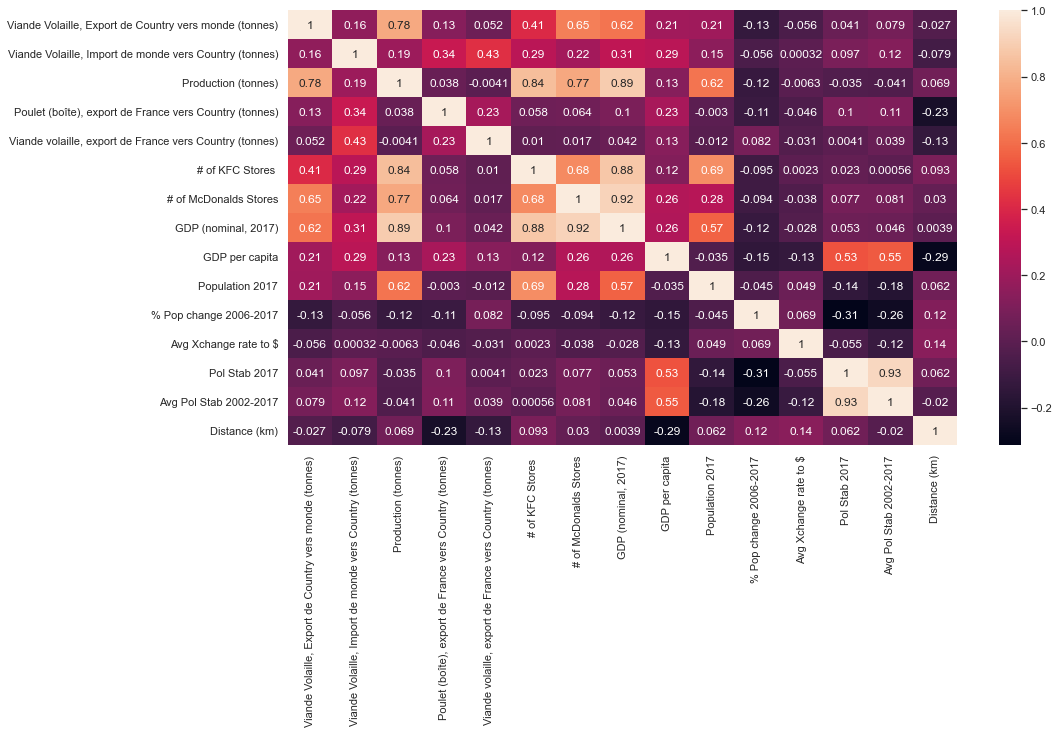

In [36]:
#Checking the correlation between variables
corrMatrix = full_data.corr()
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [37]:
#Testing if outliers have effect on correlation
full_data_no_outliers_test = full_data[(full_data.Country != 'Chine, continentale') 
                                  & (full_data.Country != 'États-Unis d\'Amérique')
                                  & (full_data.Country != 'Brésil')]
full_data_no_outliers_test

,Country,"Viande Volaille, Export de Country vers monde (tonnes)","Viande Volaille, Import de monde vers Country (tonnes)",Production (tonnes),"Poulet (boîte), export de France vers Country (tonnes)","Viande volaille, export de France vers Country (tonnes)",# of KFC Stores,# of McDonalds Stores,"GDP (nominal, 2017)",GDP per capita,Population 2017,% Pop change 2006-2017,Avg Xchange rate to $,Pol Stab 2017,Avg Pol Stab 2002-2017,Distance (km)
0,Afghanistan,0,29000,28000,0.0,244.0,0.0,0.0,1.954398e+10,538.0,36296110.0,37.313363,68.026904,-2.80,-2.444375,5583.528
1,Afrique du Sud,63000,514000,1667000,1.0,0.0,914.0,252.0,3.488716e+11,6120.0,57009760.0,17.571447,13.333781,-0.28,-0.094375,9063.963
2,Albanie,0,38000,13000,10.0,78.0,2.0,0.0,1.303854e+10,4521.0,2884170.0,-5.839009,119.099667,0.38,-0.080625,1635.822
3,Algérie,0,2000,275000,46.0,0.0,0.0,0.0,1.675553e+11,4048.0,41389190.0,23.031985,110.973017,-0.92,-1.230000,2316.022
4,Allemagne,646000,842000,1514000,1377.0,18920.0,173.0,1476.0,3.693204e+12,44680.0,82658410.0,1.455932,0.885206,0.59,0.831250,632.765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,Égypte,1000,110000,1118000,10.0,6623.0,154.0,0.0,2.353691e+11,2441.0,96442590.0,25.455962,17.782534,0.00,0.000000,3420.795
165,Émirats arabes unis,94000,433000,48000,278.0,7557.0,151.0,165.0,3.825751e+11,40325.0,9487200.0,78.998032,3.672500,0.62,0.829375,5249.794
166,Équateur,0,0,340000,0.0,0.0,144.0,0.0,1.042959e+11,6214.0,16785360.0,19.389048,1.000000,0.00,0.000000,9515.114
168,Éthiopie,0,1000,14000,20.0,42.0,0.0,0.0,0.000000e+00,0.0,106399920.0,35.559932,23.866104,-1.68,-1.550000,5660.203


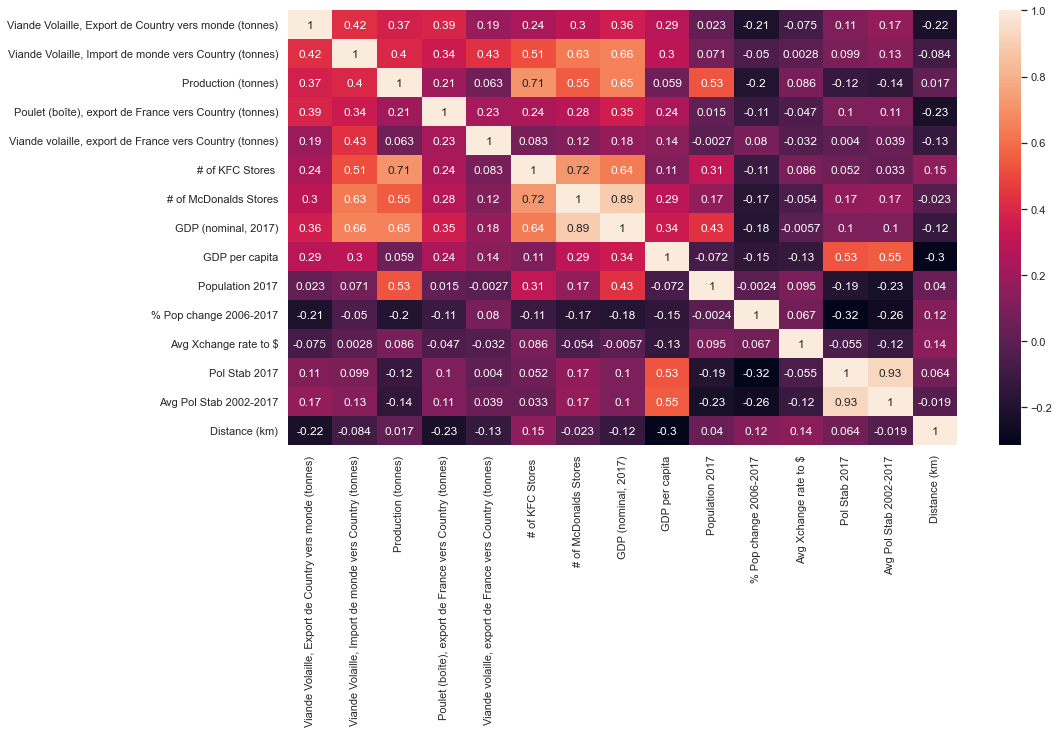

In [38]:
corrMatrix = full_data_no_outliers_test.corr()
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [39]:
#Removing the features with over 0.9 correlation
full_data.drop(['Avg Pol Stab 2002-2017', '# of McDonalds Stores'], axis=1, inplace=True)
full_data

,Country,"Viande Volaille, Export de Country vers monde (tonnes)","Viande Volaille, Import de monde vers Country (tonnes)",Production (tonnes),"Poulet (boîte), export de France vers Country (tonnes)","Viande volaille, export de France vers Country (tonnes)",# of KFC Stores,"GDP (nominal, 2017)",GDP per capita,Population 2017,% Pop change 2006-2017,Avg Xchange rate to $,Pol Stab 2017,Distance (km)
0,Afghanistan,0,29000,28000,0.0,244.0,0.0,1.954398e+10,538.0,36296110.0,37.313363,68.026904,-2.80,5583.528
1,Afrique du Sud,63000,514000,1667000,1.0,0.0,914.0,3.488716e+11,6120.0,57009760.0,17.571447,13.333781,-0.28,9063.963
2,Albanie,0,38000,13000,10.0,78.0,2.0,1.303854e+10,4521.0,2884170.0,-5.839009,119.099667,0.38,1635.822
3,Algérie,0,2000,275000,46.0,0.0,0.0,1.675553e+11,4048.0,41389190.0,23.031985,110.973017,-0.92,2316.022
4,Allemagne,646000,842000,1514000,1377.0,18920.0,173.0,3.693204e+12,44680.0,82658410.0,1.455932,0.885206,0.59,632.765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Émirats arabes unis,94000,433000,48000,278.0,7557.0,151.0,3.825751e+11,40325.0,9487200.0,78.998032,3.672500,0.62,5249.794
166,Équateur,0,0,340000,0.0,0.0,144.0,1.042959e+11,6214.0,16785360.0,19.389048,1.000000,0.00,9515.114
167,États-Unis d'Amérique,3692000,123000,21914000,0.0,0.0,4062.0,1.948539e+13,59939.0,325084760.0,9.177151,1.000000,0.34,7520.141
168,Éthiopie,0,1000,14000,20.0,42.0,0.0,0.000000e+00,0.0,106399920.0,35.559932,23.866104,-1.68,5660.203


In [40]:
#step 4: perform PCA on data

In [41]:
full_to_scale = full_data.set_index('Country')
full_to_scale

,"Viande Volaille, Export de Country vers monde (tonnes)","Viande Volaille, Import de monde vers Country (tonnes)",Production (tonnes),"Poulet (boîte), export de France vers Country (tonnes)","Viande volaille, export de France vers Country (tonnes)",# of KFC Stores,"GDP (nominal, 2017)",GDP per capita,Population 2017,% Pop change 2006-2017,Avg Xchange rate to $,Pol Stab 2017,Distance (km)
Country,,,,,,,,,,,,,
Afghanistan,0,29000,28000,0.0,244.0,0.0,1.954398e+10,538.0,36296110.0,37.313363,68.026904,-2.80,5583.528
Afrique du Sud,63000,514000,1667000,1.0,0.0,914.0,3.488716e+11,6120.0,57009760.0,17.571447,13.333781,-0.28,9063.963
Albanie,0,38000,13000,10.0,78.0,2.0,1.303854e+10,4521.0,2884170.0,-5.839009,119.099667,0.38,1635.822
Algérie,0,2000,275000,46.0,0.0,0.0,1.675553e+11,4048.0,41389190.0,23.031985,110.973017,-0.92,2316.022
Allemagne,646000,842000,1514000,1377.0,18920.0,173.0,3.693204e+12,44680.0,82658410.0,1.455932,0.885206,0.59,632.765
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,94000,433000,48000,278.0,7557.0,151.0,3.825751e+11,40325.0,9487200.0,78.998032,3.672500,0.62,5249.794
Équateur,0,0,340000,0.0,0.0,144.0,1.042959e+11,6214.0,16785360.0,19.389048,1.000000,0.00,9515.114
États-Unis d'Amérique,3692000,123000,21914000,0.0,0.0,4062.0,1.948539e+13,59939.0,325084760.0,9.177151,1.000000,0.34,7520.141


In [42]:
#Checking which rows and columns had infinity values

#Serbia, Montenegro and Sudan didn't exist in 2002 so '% Pop change 2002-2017' gave me infinity values.
#Serbia & Montenegro became separate states in 2006 therefore I changed the calculation to '% Pop change 2006-2017'.
#I removed Sudan (which only became a state in 2012) due to its low or negative values for most other features.
print()
print("printing column name where infinity is present")
col_name = full_to_scale.columns.to_series()[np.isinf(full_to_scale).any()]
print(col_name)

print()
print("printing row index with infinity ")
  
r = full_to_scale.index[np.isinf(full_to_scale).any(1)]
print(r)

print(full_data.loc[[100, 136, 140]])


printing column name where infinity is present
Series([], dtype: object)

printing row index with infinity 
Index([], dtype='object', name='Country')
        Country  Viande Volaille, Export de Country vers monde (tonnes)  \
100  Monténégro                                                  0        
136      Serbie                                               7000        
140      Soudan                                                  0        

     Viande Volaille, Import de monde vers Country (tonnes)  \
100                                               8000        
136                                              12000        
140                                               2000        

     Production (tonnes)  \
100                 4000   
136                85000   
140                67000   

     Poulet (boîte), export de France vers Country (tonnes)  \
100                                                0.0        
136                                               20.0  

In [43]:
#Scaling the data to give equal weight to all features
full_data_scaled = StandardScaler().fit_transform(full_to_scale)
np.mean(full_data_scaled),np.std(full_data_scaled)

(6.0283603147067325e-18, 1.0)

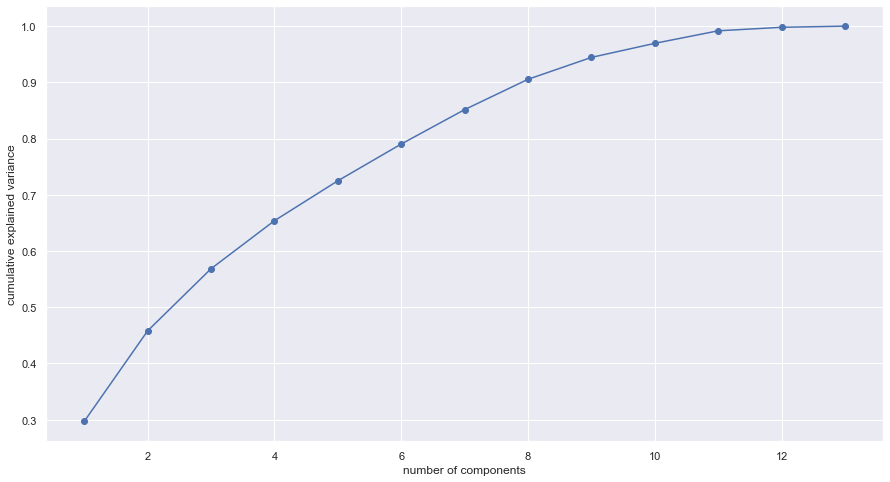

In [44]:
#Finding the adequate number of components
pca1 = PCA().fit(full_data_scaled)
plt.plot(range(1,14), np.cumsum(pca1.explained_variance_ratio_), marker = "o")
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

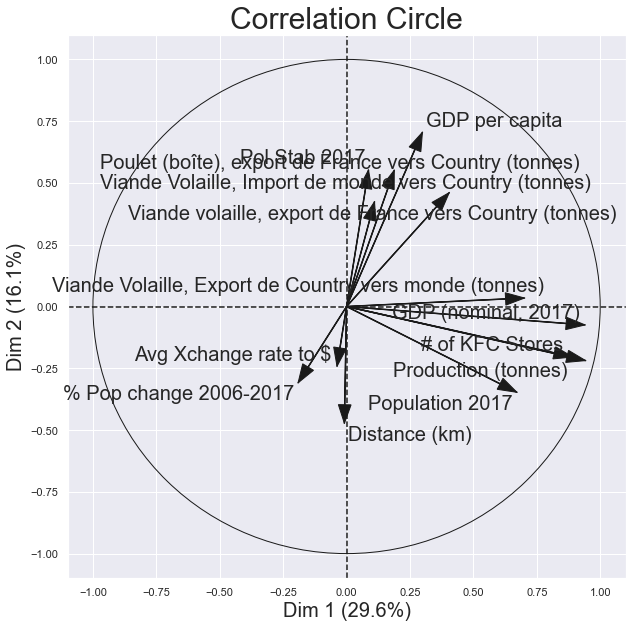

In [45]:
attribute_names = full_to_scale.columns
fig, correlation_matrix = plot_pca_correlation_graph(
    full_data_scaled, 
    attribute_names,
    dimensions=(1, 2),
    figure_axis_size=10
    )

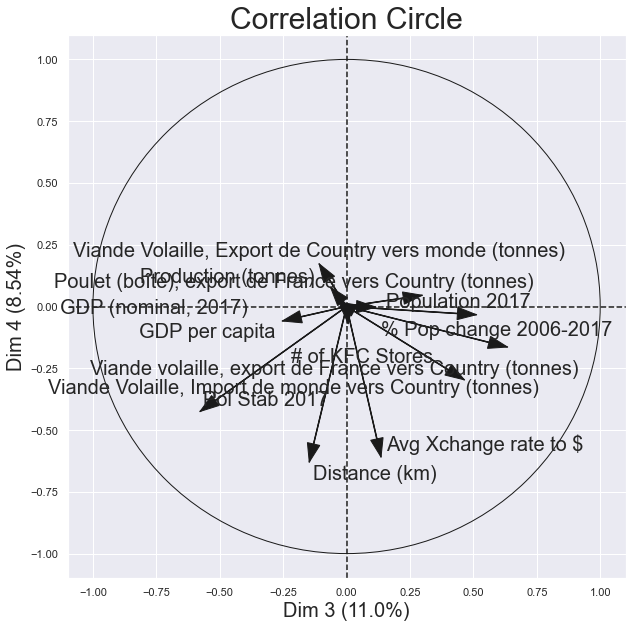

In [46]:
fig, correlation_matrix = plot_pca_correlation_graph(
    full_data_scaled, 
    attribute_names,
    dimensions=(3, 4),
    figure_axis_size=10
)

In [47]:
#Performing PCA with the previously observed number of components
pca2 = PCA(n_components = 4)
pca2.fit_transform(full_data_scaled)

array([[-8.90528270e-01, -1.82487232e+00,  1.90208262e+00,
        -1.50237330e+00],
       [ 1.13949536e+00, -1.69623482e-01,  8.15657832e-01,
         8.98482766e-01],
       [-5.13490201e-01,  5.88422063e-01, -8.58011625e-01,
        -7.06991464e-01],
       [-6.14446718e-01, -5.46609492e-01,  5.09743488e-01,
        -1.20847810e+00],
       [ 2.92424157e+00,  3.69944793e+00,  1.70011074e+00,
         6.01596018e-01],
       [-5.07214967e-01, -4.91328120e-01,  1.26578622e+00,
         2.43269241e-01],
       [-5.79305712e-01,  3.01261477e-01, -8.80114479e-01,
         2.32343301e-01],
       [ 1.33320346e+00,  4.51935045e+00,  8.35639309e+00,
         2.32509913e+00],
       [ 2.46154702e-01, -5.08567371e-01, -8.44490401e-01,
         4.84451033e-01],
       [-6.02024159e-01, -1.08393813e-01, -2.04172727e-01,
        -7.78308186e-01],
       [ 1.17906167e-01, -1.05486919e+00, -9.21925802e-01,
         1.57225669e+00],
       [ 8.70067771e-02,  2.00784945e+00, -1.21440172e+00,
      

In [48]:
pca_poulet = pca2.fit_transform(full_data_scaled)

In [49]:
#Creating a dataframe with the PCA results
principal_poulet_df = pd.DataFrame(data = pca_poulet
             , columns = ['pc 1', 'pc 2', 'pc 3', 'pc 4'])
principal_poulet_df

,pc 1,pc 2,pc 3,pc 4
0,-0.890528,-1.824872,1.902083,-1.502373
1,1.139495,-0.169623,0.815658,0.898483
2,-0.513490,0.588422,-0.858012,-0.706991
3,-0.614447,-0.546609,0.509743,-1.208478
4,2.924242,3.699448,1.700111,0.601596
...,...,...,...,...
165,0.099387,1.183688,1.987414,0.907336
166,-0.487570,-0.652012,-0.362909,0.294238
167,15.989408,-1.711347,-2.362784,-1.232628
168,-0.711981,-1.497391,1.225203,-1.043038


<AxesSubplot:xlabel='pc 4'>

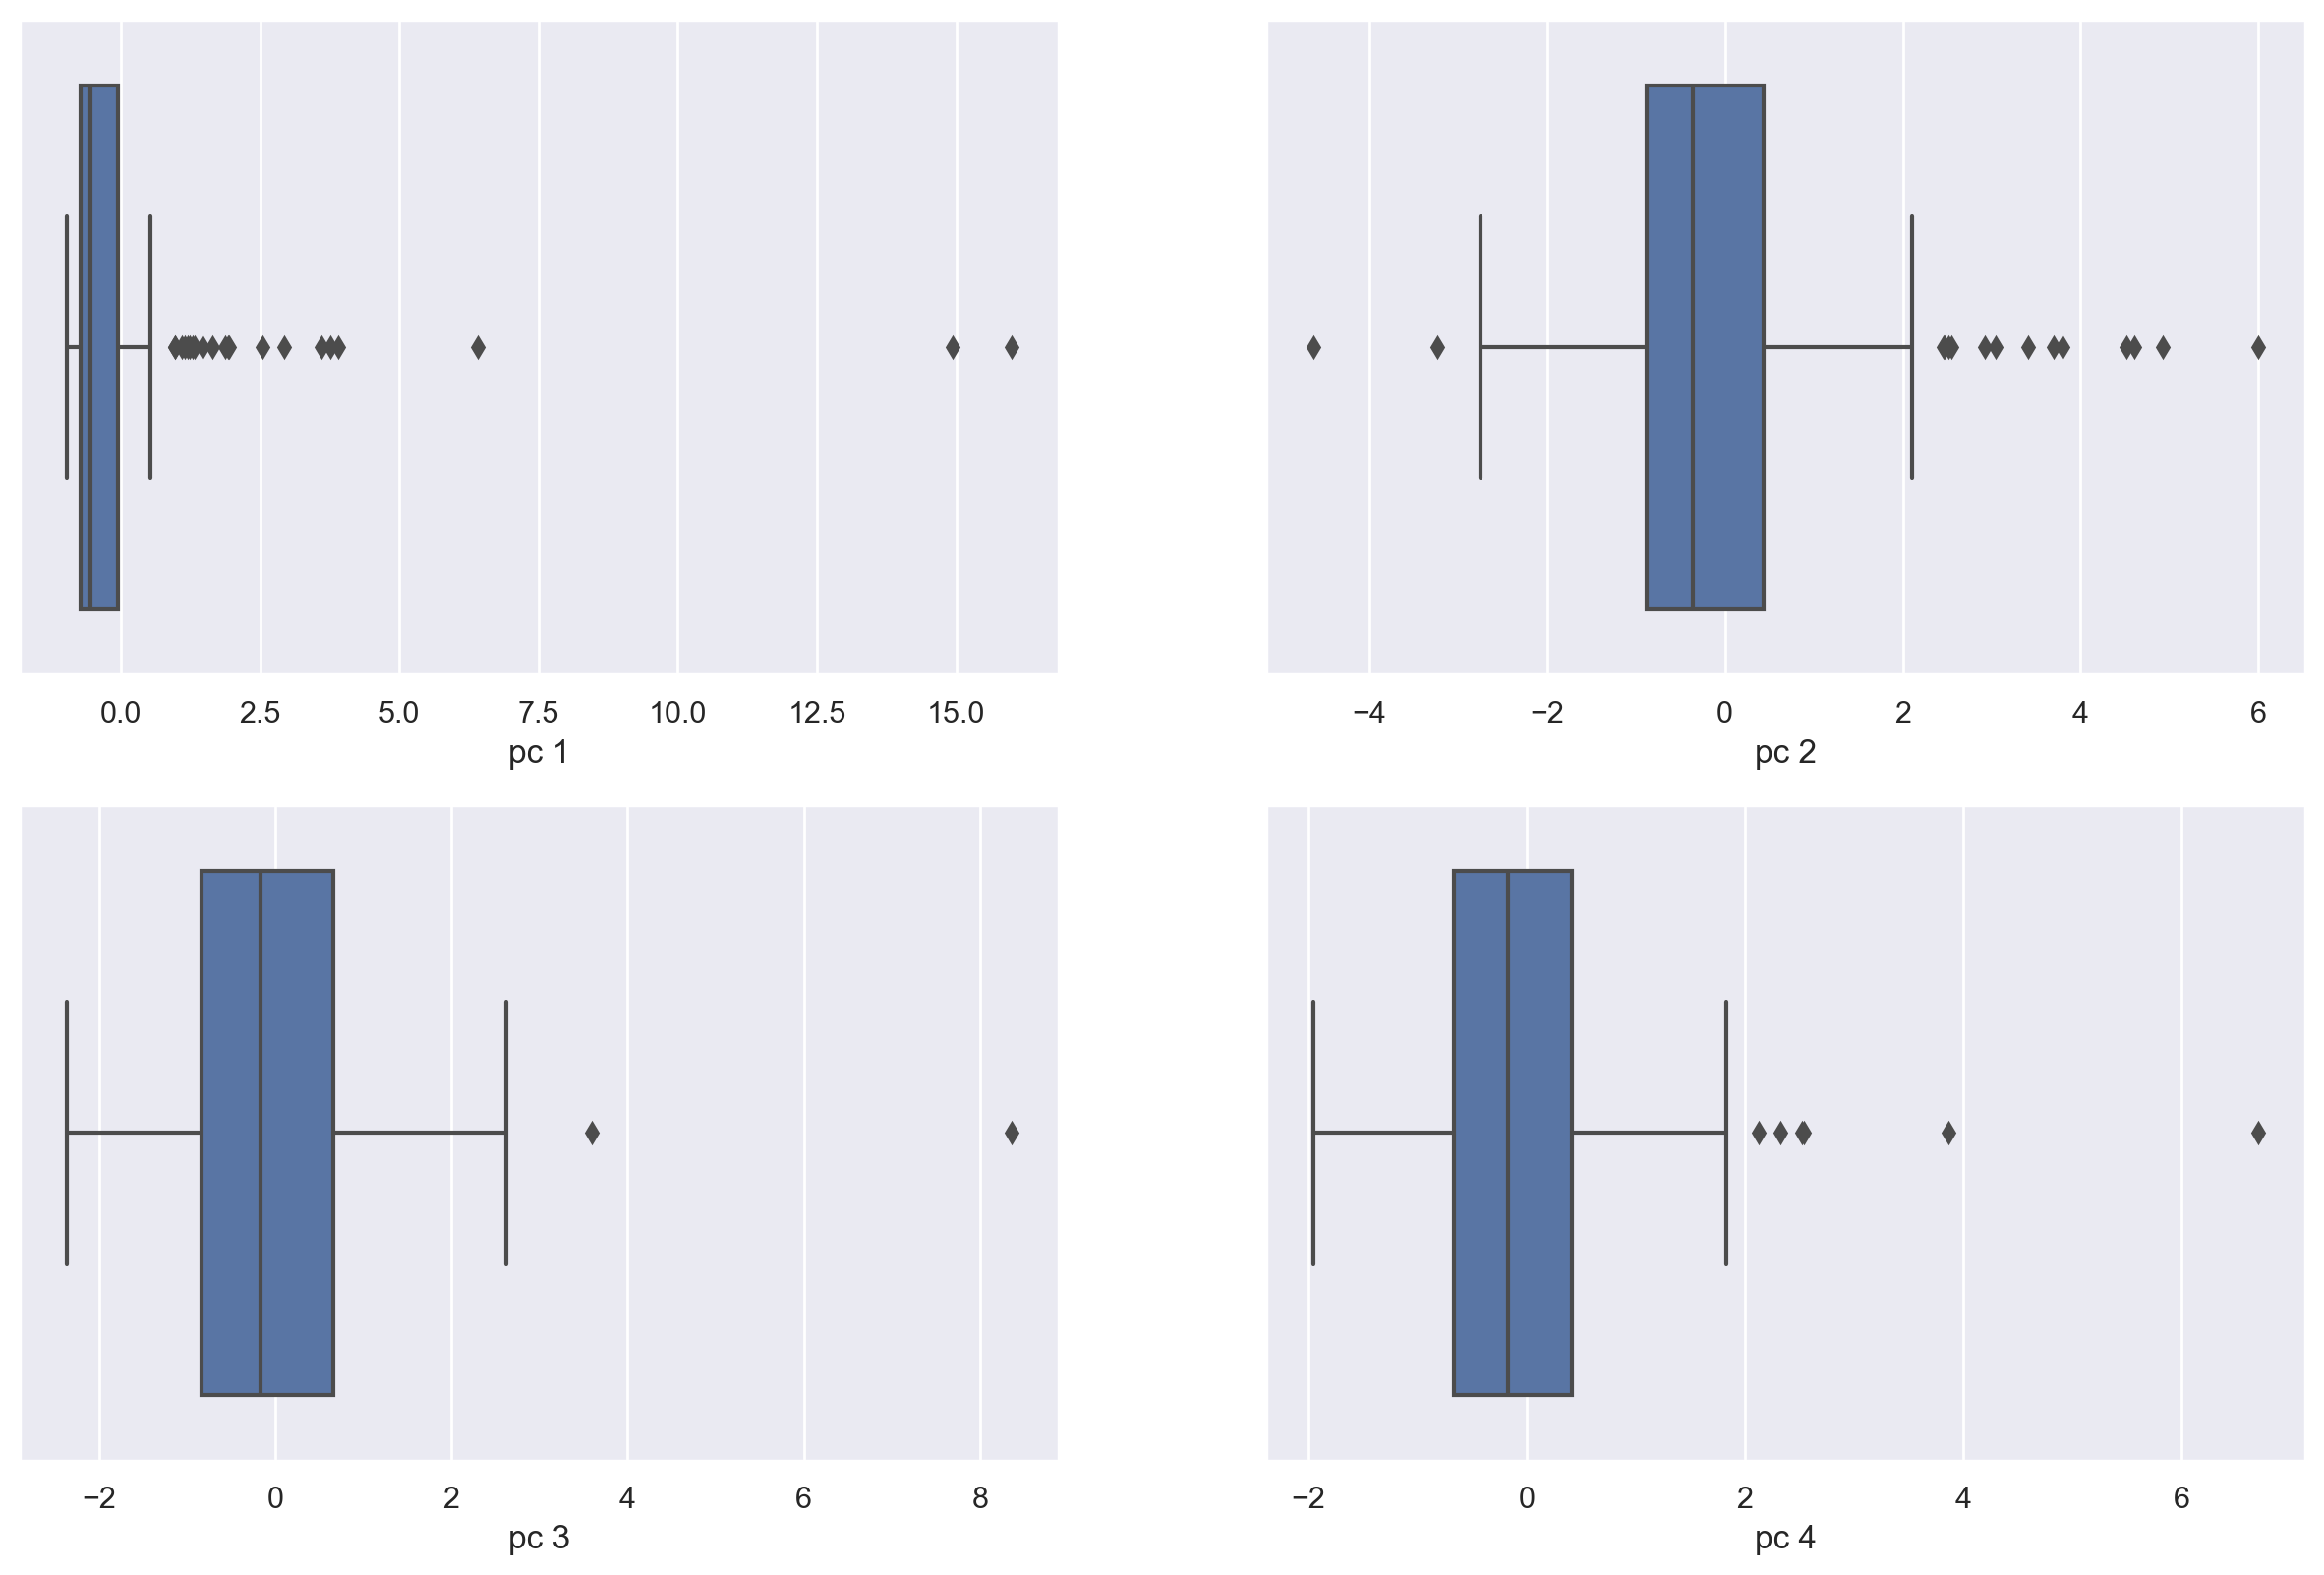

In [50]:
#Looking for outliers graphically
plt.figure(figsize=(15,15), dpi=200)

plt.subplot(3,2,1)
sns.boxplot(x = 'pc 1', data = principal_poulet_df)

plt.subplot(3,2,2)
sns.boxplot(x = 'pc 2', data = principal_poulet_df)

plt.subplot(3,2,3)
sns.boxplot(x = 'pc 3', data = principal_poulet_df)

plt.subplot(3,2,4)
sns.boxplot(x = 'pc 4', data = principal_poulet_df)

In [51]:
#Looking for outliers using the z-score
z = np.abs(stats.zscore(principal_poulet_df[['pc 1', 'pc 2', 'pc 3', 'pc 4']]))

# selecting 3 as the threshold to identify outliers
print('Below are the outlier points along with the respective column numbers in the second array')
print("\n")
print(np.where(z > 3))

Below are the outlier points along with the respective column numbers in the second array


(array([  7,   7,  21,  34,  34,  46,  67, 116, 123, 160, 167], dtype=int64), array([1, 2, 0, 0, 1, 1, 3, 1, 1, 3, 0], dtype=int64))


In [52]:
#Removing the outliers
full_data_no_outliers = full_data[(full_data.Country != 'Chine, continentale') 
                                  & (full_data.Country != 'États-Unis d\'Amérique')
                                  & (full_data.Country != 'Brésil')]
full_data_no_outliers

,Country,"Viande Volaille, Export de Country vers monde (tonnes)","Viande Volaille, Import de monde vers Country (tonnes)",Production (tonnes),"Poulet (boîte), export de France vers Country (tonnes)","Viande volaille, export de France vers Country (tonnes)",# of KFC Stores,"GDP (nominal, 2017)",GDP per capita,Population 2017,% Pop change 2006-2017,Avg Xchange rate to $,Pol Stab 2017,Distance (km)
0,Afghanistan,0,29000,28000,0.0,244.0,0.0,1.954398e+10,538.0,36296110.0,37.313363,68.026904,-2.80,5583.528
1,Afrique du Sud,63000,514000,1667000,1.0,0.0,914.0,3.488716e+11,6120.0,57009760.0,17.571447,13.333781,-0.28,9063.963
2,Albanie,0,38000,13000,10.0,78.0,2.0,1.303854e+10,4521.0,2884170.0,-5.839009,119.099667,0.38,1635.822
3,Algérie,0,2000,275000,46.0,0.0,0.0,1.675553e+11,4048.0,41389190.0,23.031985,110.973017,-0.92,2316.022
4,Allemagne,646000,842000,1514000,1377.0,18920.0,173.0,3.693204e+12,44680.0,82658410.0,1.455932,0.885206,0.59,632.765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,Égypte,1000,110000,1118000,10.0,6623.0,154.0,2.353691e+11,2441.0,96442590.0,25.455962,17.782534,0.00,3420.795
165,Émirats arabes unis,94000,433000,48000,278.0,7557.0,151.0,3.825751e+11,40325.0,9487200.0,78.998032,3.672500,0.62,5249.794
166,Équateur,0,0,340000,0.0,0.0,144.0,1.042959e+11,6214.0,16785360.0,19.389048,1.000000,0.00,9515.114
168,Éthiopie,0,1000,14000,20.0,42.0,0.0,0.000000e+00,0.0,106399920.0,35.559932,23.866104,-1.68,5660.203


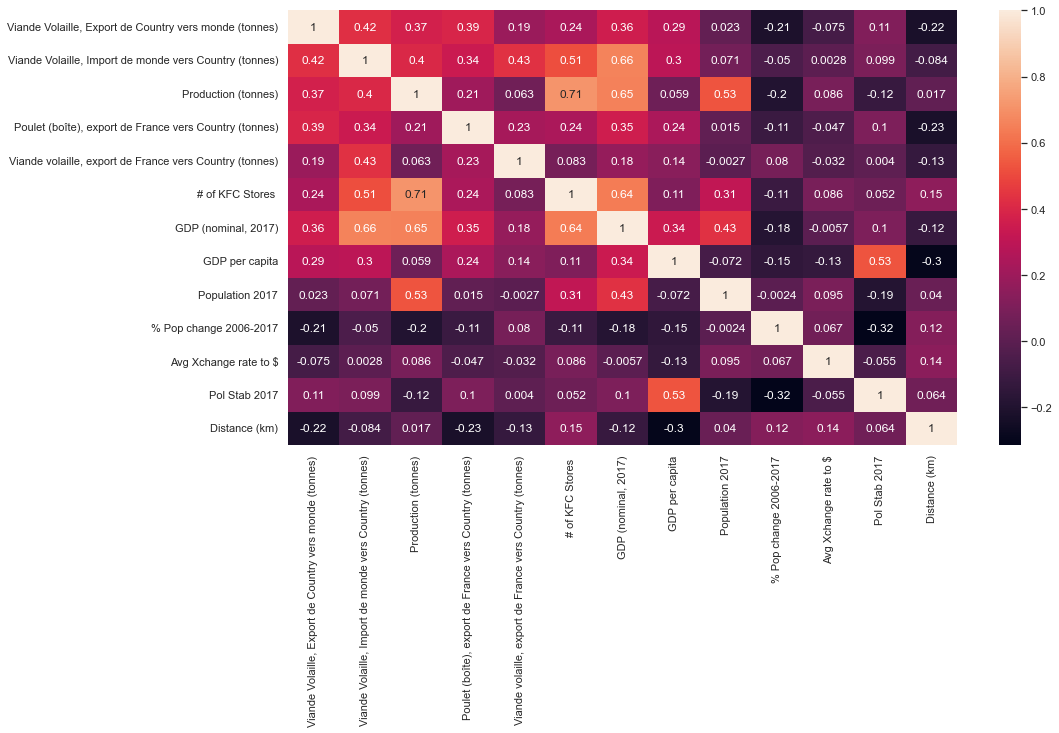

In [53]:
#Verifying correlation once outliers have been removed
corrMatrix = full_data_no_outliers.corr()
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [54]:
#Redoing PCA without outliers
full_no_outliers_to_scale = full_data_no_outliers.set_index('Country')
full_no_outliers_to_scale

,"Viande Volaille, Export de Country vers monde (tonnes)","Viande Volaille, Import de monde vers Country (tonnes)",Production (tonnes),"Poulet (boîte), export de France vers Country (tonnes)","Viande volaille, export de France vers Country (tonnes)",# of KFC Stores,"GDP (nominal, 2017)",GDP per capita,Population 2017,% Pop change 2006-2017,Avg Xchange rate to $,Pol Stab 2017,Distance (km)
Country,,,,,,,,,,,,,
Afghanistan,0,29000,28000,0.0,244.0,0.0,1.954398e+10,538.0,36296110.0,37.313363,68.026904,-2.80,5583.528
Afrique du Sud,63000,514000,1667000,1.0,0.0,914.0,3.488716e+11,6120.0,57009760.0,17.571447,13.333781,-0.28,9063.963
Albanie,0,38000,13000,10.0,78.0,2.0,1.303854e+10,4521.0,2884170.0,-5.839009,119.099667,0.38,1635.822
Algérie,0,2000,275000,46.0,0.0,0.0,1.675553e+11,4048.0,41389190.0,23.031985,110.973017,-0.92,2316.022
Allemagne,646000,842000,1514000,1377.0,18920.0,173.0,3.693204e+12,44680.0,82658410.0,1.455932,0.885206,0.59,632.765
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Égypte,1000,110000,1118000,10.0,6623.0,154.0,2.353691e+11,2441.0,96442590.0,25.455962,17.782534,0.00,3420.795
Émirats arabes unis,94000,433000,48000,278.0,7557.0,151.0,3.825751e+11,40325.0,9487200.0,78.998032,3.672500,0.62,5249.794
Équateur,0,0,340000,0.0,0.0,144.0,1.042959e+11,6214.0,16785360.0,19.389048,1.000000,0.00,9515.114


In [55]:
full_no_outliers_scaled = StandardScaler().fit_transform(full_no_outliers_to_scale)
np.mean(full_no_outliers_scaled),np.std(full_no_outliers_scaled)

(-4.9093233700605726e-18, 1.0)

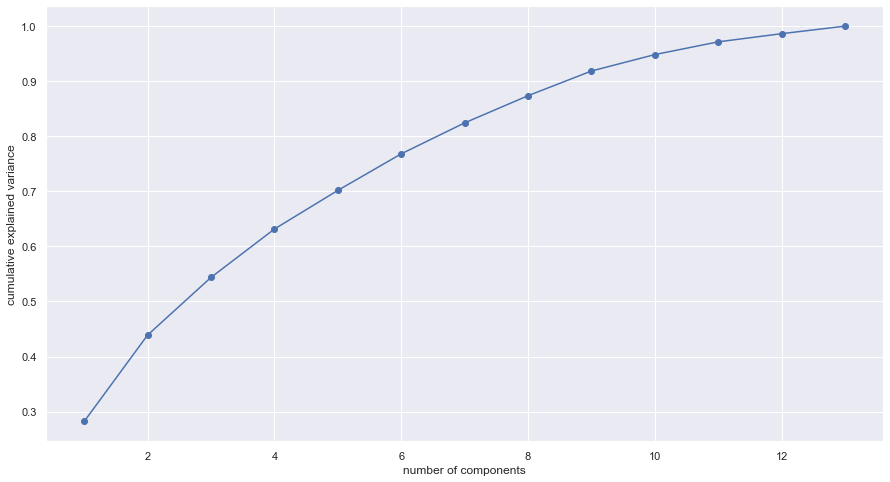

In [56]:
pca3 = PCA().fit(full_no_outliers_scaled)
plt.plot(range(1,14), np.cumsum(pca3.explained_variance_ratio_), marker = "o")
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

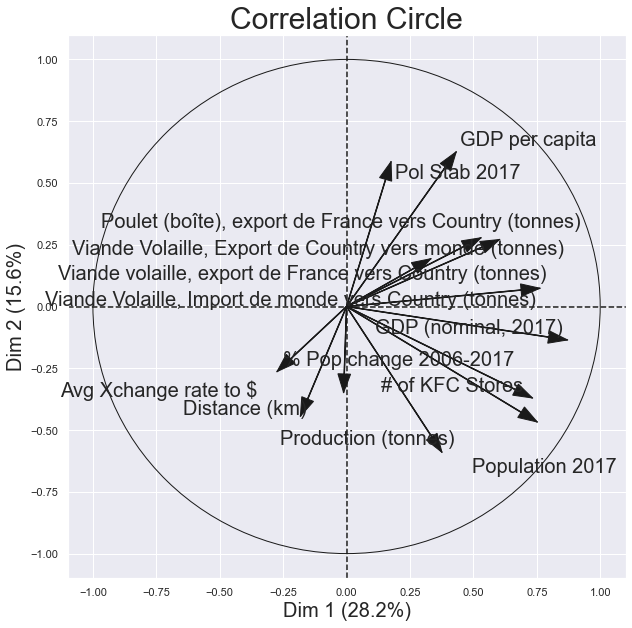

In [57]:
attribute_names = full_no_outliers_to_scale.columns
fig, correlation_matrix = plot_pca_correlation_graph(
    full_no_outliers_scaled, 
    attribute_names,
    dimensions=(1, 2),
    figure_axis_size=10
    )

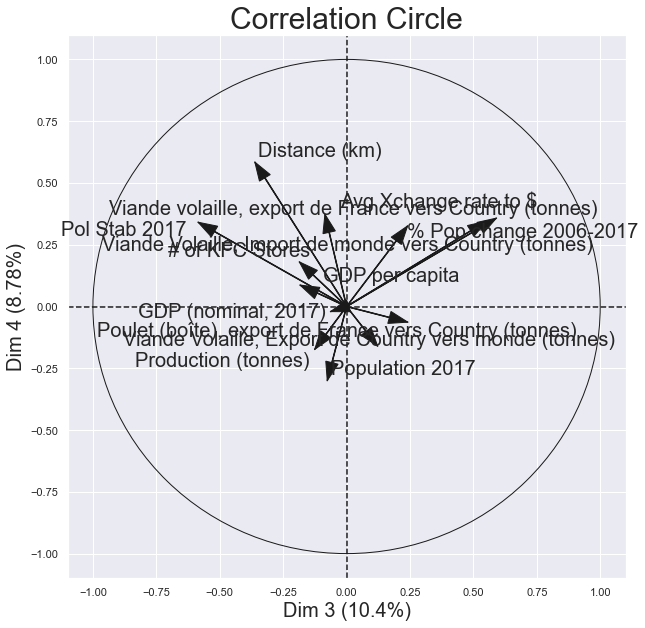

In [58]:
attribute_names = full_no_outliers_to_scale.columns
fig, correlation_matrix = plot_pca_correlation_graph(
    full_no_outliers_scaled, 
    attribute_names,
    dimensions=(3, 4),
    figure_axis_size=10
    )

In [59]:
pca4 = PCA(n_components = 4)
pca4.fit_transform(full_no_outliers_scaled)

array([[-1.41072256e+00,  1.53098723e+00,  2.16012188e+00,
        -8.66706328e-01],
       [ 3.15008653e+00,  2.21218707e+00, -6.26360495e-01,
         1.28743456e+00],
       [-6.25397398e-01, -9.35289632e-01, -5.43958779e-01,
        -9.87636729e-01],
       [-7.87163396e-01,  3.32631335e-01,  8.36397834e-01,
        -1.03091060e+00],
       [ 7.18427634e+00, -1.58570874e+00,  1.14794663e+00,
         2.80278061e-01],
       [-6.17606278e-01,  4.81544704e-01,  1.20040080e+00,
         8.52025453e-01],
       [-8.43500975e-01, -7.56481494e-01, -6.79895085e-01,
         2.46486418e-01],
       [ 4.00845080e+00, -1.31026595e+00,  7.36683521e+00,
         5.03381268e+00],
       [ 1.06364067e+00,  8.54424113e-01, -1.06645594e+00,
        -1.99266310e-01],
       [-8.17659179e-01, -2.11294025e-01,  1.99266249e-02,
        -9.21772813e-01],
       [ 8.79951715e-01,  1.76475289e+00, -1.87754689e+00,
         1.70020923e+00],
       [ 5.53959761e-01, -2.14326466e+00, -7.84107037e-01,
      

In [60]:
pca_no_outliers_poulet = pca4.fit_transform(full_no_outliers_scaled)

In [61]:
pca_no_outliers_poulet_df = pd.DataFrame(data = pca_no_outliers_poulet
             , columns = ['pc 1', 'pc 2', 'pc 3', 'pc 4'])
pca_no_outliers_poulet_df

,pc 1,pc 2,pc 3,pc 4
0,-1.410723,1.530987,2.160122,-0.866706
1,3.150087,2.212187,-0.626360,1.287435
2,-0.625397,-0.935290,-0.543959,-0.987637
3,-0.787163,0.332631,0.836398,-1.030911
4,7.184276,-1.585709,1.147947,0.280278
...,...,...,...,...
162,0.520479,0.717120,0.557986,-0.261423
163,0.827129,-0.740044,1.952402,2.345564
164,-0.580633,0.506395,-0.483361,0.399848
165,-1.246078,1.277723,1.401824,-0.731129


In [62]:
#Step 5a: K-Means clustering after PCA

In [63]:
#Finding the appropriate number of clusters using the Within Cluster Sum of Squares (WCSS) method
wcss = []
cl_num = 20
for i in range (1,cl_num):
    kmeans_pca = KMeans(n_clusters = i, init = "k-means++", random_state = 147)
    kmeans_pca.fit(pca_no_outliers_poulet)
    wcss.append(kmeans_pca.inertia_)

C:\Users\caspe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


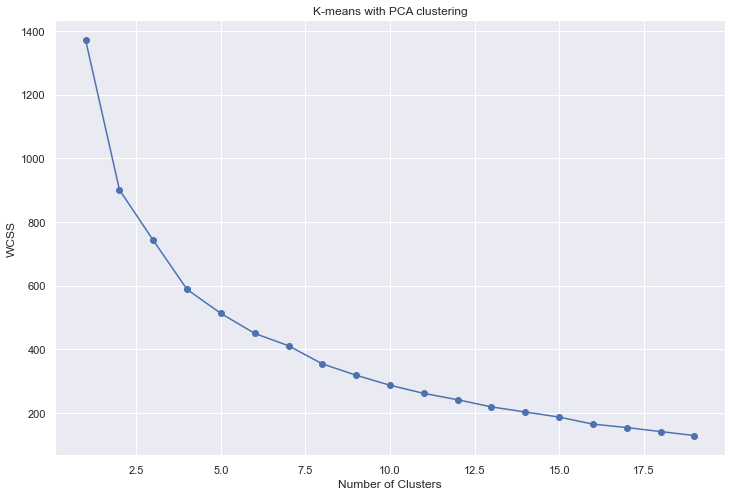

In [64]:
plt.figure(figsize = (12,8))
plt.plot(range(1,cl_num), wcss, marker = "o")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("K-means with PCA clustering")
plt.show()

In [65]:
#Performing KMeans clustering using the appropriate number of Clusters, i.e. 4
kmeans_pca = KMeans(n_clusters = 4, init = "k-means++", random_state = 147)
kmeans_pca.fit(pca_no_outliers_poulet)

KMeans(n_clusters=4, random_state=147)

In [66]:
full_data_pca_clusters = pd.concat([full_data_no_outliers.reset_index(drop = True), pca_no_outliers_poulet_df], axis = 1)
full_data_pca_clusters["Segment K-means PCA"] = kmeans_pca.labels_
full_data_pca_clusters

,Country,"Viande Volaille, Export de Country vers monde (tonnes)","Viande Volaille, Import de monde vers Country (tonnes)",Production (tonnes),"Poulet (boîte), export de France vers Country (tonnes)","Viande volaille, export de France vers Country (tonnes)",# of KFC Stores,"GDP (nominal, 2017)",GDP per capita,Population 2017,% Pop change 2006-2017,Avg Xchange rate to $,Pol Stab 2017,Distance (km),pc 1,pc 2,pc 3,pc 4,Segment K-means PCA
0,Afghanistan,0,29000,28000,0.0,244.0,0.0,1.954398e+10,538.0,36296110.0,37.313363,68.026904,-2.80,5583.528,-1.410723,1.530987,2.160122,-0.866706,0
1,Afrique du Sud,63000,514000,1667000,1.0,0.0,914.0,3.488716e+11,6120.0,57009760.0,17.571447,13.333781,-0.28,9063.963,3.150087,2.212187,-0.626360,1.287435,3
2,Albanie,0,38000,13000,10.0,78.0,2.0,1.303854e+10,4521.0,2884170.0,-5.839009,119.099667,0.38,1635.822,-0.625397,-0.935290,-0.543959,-0.987637,2
3,Algérie,0,2000,275000,46.0,0.0,0.0,1.675553e+11,4048.0,41389190.0,23.031985,110.973017,-0.92,2316.022,-0.787163,0.332631,0.836398,-1.030911,0
4,Allemagne,646000,842000,1514000,1377.0,18920.0,173.0,3.693204e+12,44680.0,82658410.0,1.455932,0.885206,0.59,632.765,7.184276,-1.585709,1.147947,0.280278,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Égypte,1000,110000,1118000,10.0,6623.0,154.0,2.353691e+11,2441.0,96442590.0,25.455962,17.782534,0.00,3420.795,0.520479,0.717120,0.557986,-0.261423,0
163,Émirats arabes unis,94000,433000,48000,278.0,7557.0,151.0,3.825751e+11,40325.0,9487200.0,78.998032,3.672500,0.62,5249.794,0.827129,-0.740044,1.952402,2.345564,0
164,Équateur,0,0,340000,0.0,0.0,144.0,1.042959e+11,6214.0,16785360.0,19.389048,1.000000,0.00,9515.114,-0.580633,0.506395,-0.483361,0.399848,0
165,Éthiopie,0,1000,14000,20.0,42.0,0.0,0.000000e+00,0.0,106399920.0,35.559932,23.866104,-1.68,5660.203,-1.246078,1.277723,1.401824,-0.731129,0


In [67]:
full_data_pca_clusters["KMeans segment"] = full_data_pca_clusters["Segment K-means PCA"].map({0:"group 1",
                                                                                              1:"group 2",
                                                                                              2:"group 3",
                                                                                              3:"group 4"})
full_data_pca_clusters.drop(["Segment K-means PCA"], axis=1, inplace=True)
full_data_pca_clusters

,Country,"Viande Volaille, Export de Country vers monde (tonnes)","Viande Volaille, Import de monde vers Country (tonnes)",Production (tonnes),"Poulet (boîte), export de France vers Country (tonnes)","Viande volaille, export de France vers Country (tonnes)",# of KFC Stores,"GDP (nominal, 2017)",GDP per capita,Population 2017,% Pop change 2006-2017,Avg Xchange rate to $,Pol Stab 2017,Distance (km),pc 1,pc 2,pc 3,pc 4,KMeans segment
0,Afghanistan,0,29000,28000,0.0,244.0,0.0,1.954398e+10,538.0,36296110.0,37.313363,68.026904,-2.80,5583.528,-1.410723,1.530987,2.160122,-0.866706,group 1
1,Afrique du Sud,63000,514000,1667000,1.0,0.0,914.0,3.488716e+11,6120.0,57009760.0,17.571447,13.333781,-0.28,9063.963,3.150087,2.212187,-0.626360,1.287435,group 4
2,Albanie,0,38000,13000,10.0,78.0,2.0,1.303854e+10,4521.0,2884170.0,-5.839009,119.099667,0.38,1635.822,-0.625397,-0.935290,-0.543959,-0.987637,group 3
3,Algérie,0,2000,275000,46.0,0.0,0.0,1.675553e+11,4048.0,41389190.0,23.031985,110.973017,-0.92,2316.022,-0.787163,0.332631,0.836398,-1.030911,group 1
4,Allemagne,646000,842000,1514000,1377.0,18920.0,173.0,3.693204e+12,44680.0,82658410.0,1.455932,0.885206,0.59,632.765,7.184276,-1.585709,1.147947,0.280278,group 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Égypte,1000,110000,1118000,10.0,6623.0,154.0,2.353691e+11,2441.0,96442590.0,25.455962,17.782534,0.00,3420.795,0.520479,0.717120,0.557986,-0.261423,group 1
163,Émirats arabes unis,94000,433000,48000,278.0,7557.0,151.0,3.825751e+11,40325.0,9487200.0,78.998032,3.672500,0.62,5249.794,0.827129,-0.740044,1.952402,2.345564,group 1
164,Équateur,0,0,340000,0.0,0.0,144.0,1.042959e+11,6214.0,16785360.0,19.389048,1.000000,0.00,9515.114,-0.580633,0.506395,-0.483361,0.399848,group 1
165,Éthiopie,0,1000,14000,20.0,42.0,0.0,0.000000e+00,0.0,106399920.0,35.559932,23.866104,-1.68,5660.203,-1.246078,1.277723,1.401824,-0.731129,group 1


C:\Users\caspe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


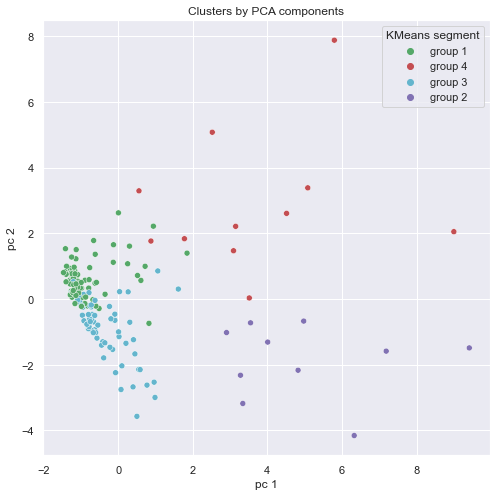

In [68]:
#A scatterplot using the 1st and 2nd Principal Components and their division into clusters using the KMeans method
x_axis = full_data_pca_clusters["pc 1"]
y_axis = full_data_pca_clusters["pc 2"]
plt.figure(figsize = (8,8))
sns.scatterplot(x_axis, y_axis, hue = full_data_pca_clusters["KMeans segment"], palette = ['g','r','c','m'])
plt.title("Clusters by PCA components")
plt.show()

In [69]:
cluster_grouped = full_data_pca_clusters.groupby(["KMeans segment"]).mean()
cluster_grouped

,"Viande Volaille, Export de Country vers monde (tonnes)","Viande Volaille, Import de monde vers Country (tonnes)",Production (tonnes),"Poulet (boîte), export de France vers Country (tonnes)","Viande volaille, export de France vers Country (tonnes)",# of KFC Stores,"GDP (nominal, 2017)",GDP per capita,Population 2017,% Pop change 2006-2017,Avg Xchange rate to $,Pol Stab 2017,Distance (km),pc 1,pc 2,pc 3,pc 4
KMeans segment,,,,,,,,,,,,,,,,,
group 1,11589.743590,43538.461538,2.565513e+05,41.487179,848.602564,21.423077,7.576416e+10,3423.525641,2.781486e+07,28.819269,693.209097,-0.674872,6302.164051,-0.845406,0.594526,0.640459,-0.035735
group 2,567300.000000,505900.000000,1.246200e+06,5803.800000,18336.300000,212.600000,1.505171e+12,35772.400000,4.283513e+07,7.707082,2.141082,0.391000,1980.769100,4.980334,-1.861905,1.588075,0.108271
group 3,22500.000000,41852.941176,1.556324e+05,118.411765,450.250000,20.691176,1.227229e+11,20099.191176,6.218026e+06,6.499899,99.400909,0.586029,5593.279632,-0.349273,-0.872864,-0.751104,-0.087580
group 4,113363.636364,303727.272727,2.220455e+06,15.090909,144.090909,650.636364,1.296150e+12,12193.181818,2.103981e+08,12.086239,3278.150373,-0.012727,9469.410727,3.626268,2.872799,-1.341952,0.696364


In [70]:
#Step 5b: Hierarchical clustering after PCA

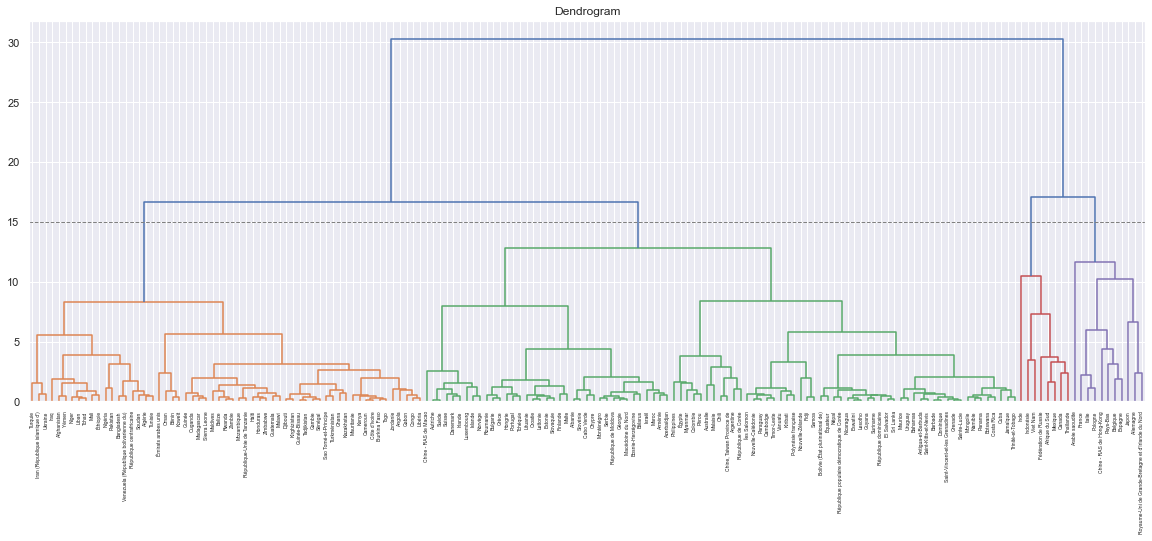

In [71]:
#Creating a dendrogram 
max_d = 15
plt.figure(figsize=(20,7))  
plt.title("Dendrogram")
Z = shc.linkage(pca_no_outliers_poulet_df, 'ward')
shc.dendrogram(Z, color_threshold=max_d, labels=full_no_outliers_to_scale.index)
plt.axhline(y=max_d, c='grey', lw=1, linestyle='dashed')

In [72]:
#Creating clusters based on the observed number of appropriate clusters, i.e. 4
k=4
hierarchy_pca = shc.fcluster(Z, k, criterion='maxclust')
hierarchy_pca

array([1, 3, 2, 1, 4, 1, 2, 4, 2, 2, 2, 2, 2, 2, 1, 2, 4, 1, 2, 2, 2, 2,
       1, 2, 1, 2, 2, 1, 3, 2, 4, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2,
       4, 2, 2, 2, 2, 4, 3, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 3, 3,
       1, 1, 2, 2, 2, 4, 2, 4, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1,
       2, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1,
       1, 1, 2, 2, 4, 2, 4, 2, 2, 2, 2, 4, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 3, 2, 1, 2, 1, 1, 1,
       1, 2, 2, 1, 3, 1, 1, 1, 2, 1, 2, 1, 2], dtype=int32)

In [73]:
hierarchy_pca_df = pd.DataFrame(data = hierarchy_pca, columns = ["Segment Hierarchy PCA"])
hierarchy_pca_df

,Segment Hierarchy PCA
0,1
1,3
2,2
3,1
4,4
...,...
162,2
163,1
164,2
165,1


In [74]:
full_pca_clust_hier = pd.concat([full_data_pca_clusters.reset_index(drop = True), hierarchy_pca_df], axis = 1)
full_pca_clust_hier.head()

,Country,"Viande Volaille, Export de Country vers monde (tonnes)","Viande Volaille, Import de monde vers Country (tonnes)",Production (tonnes),"Poulet (boîte), export de France vers Country (tonnes)","Viande volaille, export de France vers Country (tonnes)",# of KFC Stores,"GDP (nominal, 2017)",GDP per capita,Population 2017,% Pop change 2006-2017,Avg Xchange rate to $,Pol Stab 2017,Distance (km),pc 1,pc 2,pc 3,pc 4,KMeans segment,Segment Hierarchy PCA
0,Afghanistan,0,29000,28000,0.0,244.0,0.0,1.954398e+10,538.0,36296110.0,37.313363,68.026904,-2.80,5583.528,-1.410723,1.530987,2.160122,-0.866706,group 1,1
1,Afrique du Sud,63000,514000,1667000,1.0,0.0,914.0,3.488716e+11,6120.0,57009760.0,17.571447,13.333781,-0.28,9063.963,3.150087,2.212187,-0.626360,1.287435,group 4,3
2,Albanie,0,38000,13000,10.0,78.0,2.0,1.303854e+10,4521.0,2884170.0,-5.839009,119.099667,0.38,1635.822,-0.625397,-0.935290,-0.543959,-0.987637,group 3,2
3,Algérie,0,2000,275000,46.0,0.0,0.0,1.675553e+11,4048.0,41389190.0,23.031985,110.973017,-0.92,2316.022,-0.787163,0.332631,0.836398,-1.030911,group 1,1
4,Allemagne,646000,842000,1514000,1377.0,18920.0,173.0,3.693204e+12,44680.0,82658410.0,1.455932,0.885206,0.59,632.765,7.184276,-1.585709,1.147947,0.280278,group 2,4


In [75]:
full_pca_clust_hier["Hierarchy segment"] = full_pca_clust_hier["Segment Hierarchy PCA"].map({1:"group 1",
                                                                                              4:"group 2",
                                                                                              2:"group 3",
                                                                                              3:"group 4"})
full_pca_clust_hier.drop(["Segment Hierarchy PCA"], axis=1, inplace=True)
full_pca_clust_hier

,Country,"Viande Volaille, Export de Country vers monde (tonnes)","Viande Volaille, Import de monde vers Country (tonnes)",Production (tonnes),"Poulet (boîte), export de France vers Country (tonnes)","Viande volaille, export de France vers Country (tonnes)",# of KFC Stores,"GDP (nominal, 2017)",GDP per capita,Population 2017,% Pop change 2006-2017,Avg Xchange rate to $,Pol Stab 2017,Distance (km),pc 1,pc 2,pc 3,pc 4,KMeans segment,Hierarchy segment
0,Afghanistan,0,29000,28000,0.0,244.0,0.0,1.954398e+10,538.0,36296110.0,37.313363,68.026904,-2.80,5583.528,-1.410723,1.530987,2.160122,-0.866706,group 1,group 1
1,Afrique du Sud,63000,514000,1667000,1.0,0.0,914.0,3.488716e+11,6120.0,57009760.0,17.571447,13.333781,-0.28,9063.963,3.150087,2.212187,-0.626360,1.287435,group 4,group 4
2,Albanie,0,38000,13000,10.0,78.0,2.0,1.303854e+10,4521.0,2884170.0,-5.839009,119.099667,0.38,1635.822,-0.625397,-0.935290,-0.543959,-0.987637,group 3,group 3
3,Algérie,0,2000,275000,46.0,0.0,0.0,1.675553e+11,4048.0,41389190.0,23.031985,110.973017,-0.92,2316.022,-0.787163,0.332631,0.836398,-1.030911,group 1,group 1
4,Allemagne,646000,842000,1514000,1377.0,18920.0,173.0,3.693204e+12,44680.0,82658410.0,1.455932,0.885206,0.59,632.765,7.184276,-1.585709,1.147947,0.280278,group 2,group 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Égypte,1000,110000,1118000,10.0,6623.0,154.0,2.353691e+11,2441.0,96442590.0,25.455962,17.782534,0.00,3420.795,0.520479,0.717120,0.557986,-0.261423,group 1,group 3
163,Émirats arabes unis,94000,433000,48000,278.0,7557.0,151.0,3.825751e+11,40325.0,9487200.0,78.998032,3.672500,0.62,5249.794,0.827129,-0.740044,1.952402,2.345564,group 1,group 1
164,Équateur,0,0,340000,0.0,0.0,144.0,1.042959e+11,6214.0,16785360.0,19.389048,1.000000,0.00,9515.114,-0.580633,0.506395,-0.483361,0.399848,group 1,group 3
165,Éthiopie,0,1000,14000,20.0,42.0,0.0,0.000000e+00,0.0,106399920.0,35.559932,23.866104,-1.68,5660.203,-1.246078,1.277723,1.401824,-0.731129,group 1,group 1


C:\Users\caspe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


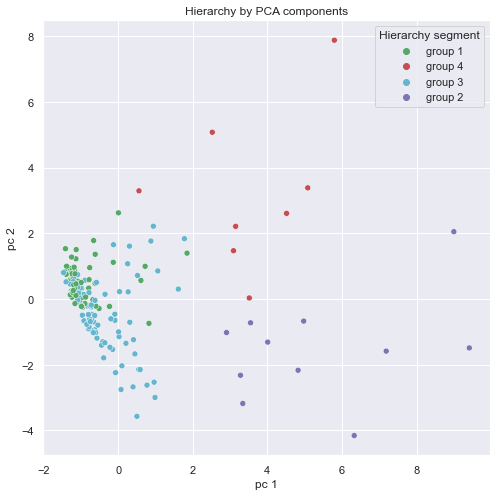

In [76]:
#A scatterplot using the 1st and 2nd Principal Components and their division into clusters using the hierarchical method
x_axis = full_pca_clust_hier["pc 1"]
y_axis = full_pca_clust_hier["pc 2"]
plt.figure(figsize = (8,8))
sns.scatterplot(x_axis, y_axis, hue = full_pca_clust_hier["Hierarchy segment"], palette = ['g','r','c','m'])
plt.title("Hierarchy by PCA components")
plt.show()

In [77]:
#comparing the 4 groups using the mean of each feature
hierarchy_grouped = full_pca_clust_hier.groupby(["Hierarchy segment"]).mean()
hierarchy_grouped

,"Viande Volaille, Export de Country vers monde (tonnes)","Viande Volaille, Import de monde vers Country (tonnes)",Production (tonnes),"Poulet (boîte), export de France vers Country (tonnes)","Viande volaille, export de France vers Country (tonnes)",# of KFC Stores,"GDP (nominal, 2017)",GDP per capita,Population 2017,% Pop change 2006-2017,Avg Xchange rate to $,Pol Stab 2017,Distance (km),pc 1,pc 2,pc 3,pc 4
Hierarchy segment,,,,,,,,,,,,,,,,,
group 1,15220.338983,50084.745763,1.868644e+05,25.762712,996.525424,13.322034,7.657699e+10,3660.050847,2.864485e+07,32.945420,667.297545,-0.790508,5284.478610,-0.894717,0.558692,0.934417,-0.121871
group 2,516636.363636,557090.909091,1.334273e+06,5276.363636,16680.454545,296.090909,1.811284e+12,35994.363636,5.053218e+07,6.941312,12.143360,0.456364,2673.922909,5.345513,-1.506263,1.231457,0.314879
group 3,18224.719101,37876.404494,2.535056e+05,110.550562,429.651685,41.157303,1.129374e+11,16044.438202,1.076435e+07,8.815716,241.175521,0.391685,6579.277416,-0.384792,-0.475781,-0.667331,0.010824
group 4,143875.000000,273500.000000,2.402125e+06,11.625000,154.625000,581.875000,1.133816e+12,10724.125000,2.663984e+08,11.897817,4492.735346,-0.282500,8641.242500,3.529274,3.243819,-1.160518,0.345423


In [78]:
hierarchy_grouped_to_scale = hierarchy_grouped.drop(['pc 1', 'pc 2', 'pc 3', 'pc 4'], axis=1)
hierarchy_grouped_scaled = StandardScaler().fit_transform(hierarchy_grouped_to_scale)
hierarchy_grouped_scaled_df = pd.DataFrame(hierarchy_grouped_scaled, columns = hierarchy_grouped_to_scale.columns,
                                          index = hierarchy_grouped_to_scale.index)

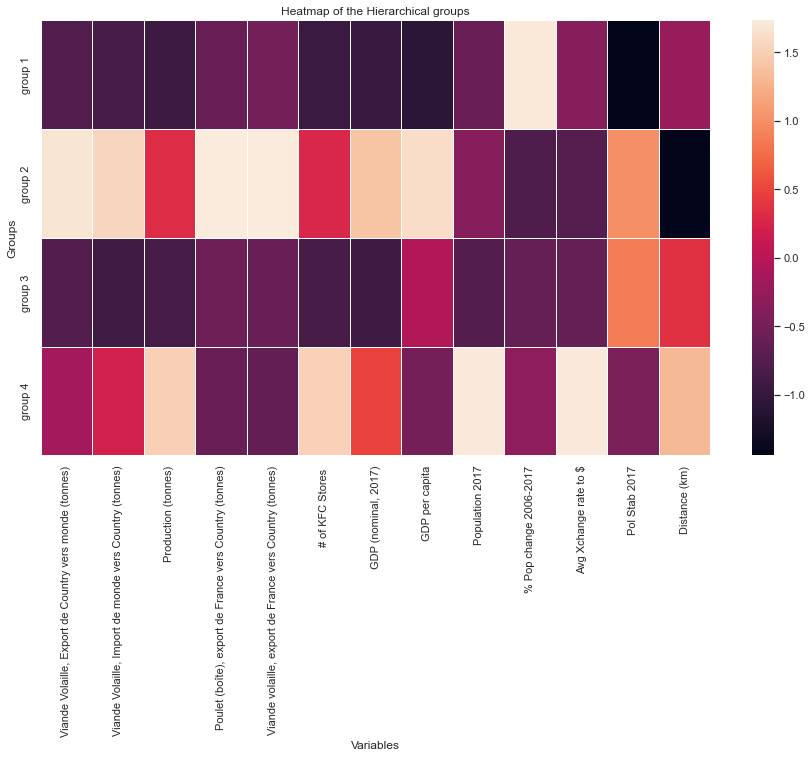

In [79]:
ax = sns.heatmap(hierarchy_grouped_scaled_df, linewidth=0.5)
ax.set(title="Heatmap of the Hierarchical groups",
      xlabel="Variables",
      ylabel="Groups",)
plt.show()

In [80]:
#for easy comparison
cluster_grouped

,"Viande Volaille, Export de Country vers monde (tonnes)","Viande Volaille, Import de monde vers Country (tonnes)",Production (tonnes),"Poulet (boîte), export de France vers Country (tonnes)","Viande volaille, export de France vers Country (tonnes)",# of KFC Stores,"GDP (nominal, 2017)",GDP per capita,Population 2017,% Pop change 2006-2017,Avg Xchange rate to $,Pol Stab 2017,Distance (km),pc 1,pc 2,pc 3,pc 4
KMeans segment,,,,,,,,,,,,,,,,,
group 1,11589.743590,43538.461538,2.565513e+05,41.487179,848.602564,21.423077,7.576416e+10,3423.525641,2.781486e+07,28.819269,693.209097,-0.674872,6302.164051,-0.845406,0.594526,0.640459,-0.035735
group 2,567300.000000,505900.000000,1.246200e+06,5803.800000,18336.300000,212.600000,1.505171e+12,35772.400000,4.283513e+07,7.707082,2.141082,0.391000,1980.769100,4.980334,-1.861905,1.588075,0.108271
group 3,22500.000000,41852.941176,1.556324e+05,118.411765,450.250000,20.691176,1.227229e+11,20099.191176,6.218026e+06,6.499899,99.400909,0.586029,5593.279632,-0.349273,-0.872864,-0.751104,-0.087580
group 4,113363.636364,303727.272727,2.220455e+06,15.090909,144.090909,650.636364,1.296150e+12,12193.181818,2.103981e+08,12.086239,3278.150373,-0.012727,9469.410727,3.626268,2.872799,-1.341952,0.696364


In [81]:
#standardising to give equal weight to each feature
cluster_grouped_to_scale = cluster_grouped.drop(['pc 1', 'pc 2', 'pc 3', 'pc 4'], axis=1)
cluster_grouped_scaled = StandardScaler().fit_transform(cluster_grouped_to_scale)
cluster_grouped_scaled_df = pd.DataFrame(cluster_grouped_scaled, columns = cluster_grouped_to_scale.columns,
                                          index = cluster_grouped_to_scale.index)

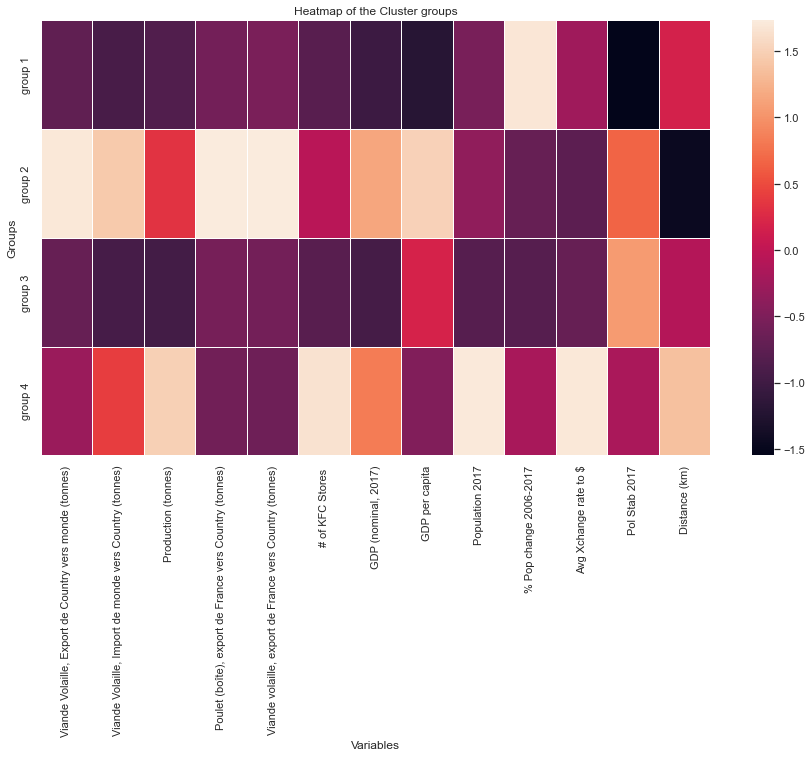

In [82]:
#Creating heatmap
ax = sns.heatmap(cluster_grouped_scaled_df, linewidth=0.5)
ax.set(title="Heatmap of the Cluster groups",
      xlabel="Variables",
      ylabel="Groups",)
plt.show()

In [83]:
#Finding the countries that are part of the most interesting group
group_2_kmeans = full_pca_clust_hier[full_pca_clust_hier["KMeans segment"] == "group 2"]
group_2_kmeans

,Country,"Viande Volaille, Export de Country vers monde (tonnes)","Viande Volaille, Import de monde vers Country (tonnes)",Production (tonnes),"Poulet (boîte), export de France vers Country (tonnes)","Viande volaille, export de France vers Country (tonnes)",# of KFC Stores,"GDP (nominal, 2017)",GDP per capita,Population 2017,% Pop change 2006-2017,Avg Xchange rate to $,Pol Stab 2017,Distance (km),pc 1,pc 2,pc 3,pc 4,KMeans segment,Hierarchy segment
4,Allemagne,646000,842000,1514000,1377.0,18920.0,173.0,3.693204e+12,44680.0,82658410.0,1.455932,0.885206,0.59,632.765,7.184276,-1.585709,1.147947,0.280278,group 2,group 2
7,Arabie saoudite,10000,722000,616000,611.0,97510.0,220.0,6.867384e+11,20747.0,33101180.0,35.116177,3.750000,-0.58,4634.583,4.008451,-1.310266,7.366835,5.033813,group 2,group 2
16,Belgique,656000,338000,463000,7166.0,12577.0,0.0,4.947636e+11,43325.0,11419750.0,7.535868,0.885206,0.43,238.288,3.342218,-3.178853,1.668972,-0.625284,group 2,group 2
30,Chine - RAS de Hong-Kong,663000,907000,24000,83.0,10404.0,75.0,3.414493e+11,46733.0,7306320.0,7.413027,7.793250,0.83,9620.545,3.279800,-2.319195,0.508448,2.050179,group 2,group 2
44,Espagne,212000,205000,1515000,16697.0,13441.0,143.0,1.314314e+12,28175.0,46647430.0,4.290010,0.885206,0.28,1203.923,4.822967,-2.166785,1.910220,-0.965483,group 2,group 2
49,France,501000,506000,1750000,0.0,0.0,248.0,2.582501e+12,39827.0,64842510.0,5.419668,0.885206,0.28,0.000,4.973287,-0.671244,-0.245796,-0.946421,group 2,group 2
71,Italie,183000,97000,1315000,4170.0,3112.0,31.0,1.943835e+12,32038.0,60673700.0,3.640220,0.885206,0.31,1056.456,2.905397,-1.020283,-0.070480,-1.320145,group 2,group 2
114,Pays-Bas,1418000,608000,1100000,8201.0,16149.0,63.0,8.305726e+11,48796.0,17021350.0,3.535562,0.885206,0.92,424.908,6.326483,-4.154413,2.109972,-0.657135,group 2,group 2
116,Pologne,1025000,55000,2351000,248.0,757.0,264.0,5.264658e+11,13871.0,37953180.0,-1.046215,3.779333,0.52,1240.231,3.548910,-0.724628,-0.477179,-2.066151,group 2,group 2
121,Royaume-Uni de Grande-Bretagne et d'Irlande du...,359000,779000,1814000,19485.0,10493.0,909.0,2.637866e+12,39532.0,66727460.0,9.710569,0.777003,0.33,755.992,9.411552,-1.487673,1.961810,0.299063,group 2,group 2


In [84]:
group_2_hier = full_pca_clust_hier[full_pca_clust_hier["Hierarchy segment"] == "group 2"]
group_2_hier

,Country,"Viande Volaille, Export de Country vers monde (tonnes)","Viande Volaille, Import de monde vers Country (tonnes)",Production (tonnes),"Poulet (boîte), export de France vers Country (tonnes)","Viande volaille, export de France vers Country (tonnes)",# of KFC Stores,"GDP (nominal, 2017)",GDP per capita,Population 2017,% Pop change 2006-2017,Avg Xchange rate to $,Pol Stab 2017,Distance (km),pc 1,pc 2,pc 3,pc 4,KMeans segment,Hierarchy segment
4,Allemagne,646000,842000,1514000,1377.0,18920.0,173.0,3.693204e+12,44680.0,82658410.0,1.455932,0.885206,0.59,632.765,7.184276,-1.585709,1.147947,0.280278,group 2,group 2
7,Arabie saoudite,10000,722000,616000,611.0,97510.0,220.0,6.867384e+11,20747.0,33101180.0,35.116177,3.750000,-0.58,4634.583,4.008451,-1.310266,7.366835,5.033813,group 2,group 2
16,Belgique,656000,338000,463000,7166.0,12577.0,0.0,4.947636e+11,43325.0,11419750.0,7.535868,0.885206,0.43,238.288,3.342218,-3.178853,1.668972,-0.625284,group 2,group 2
30,Chine - RAS de Hong-Kong,663000,907000,24000,83.0,10404.0,75.0,3.414493e+11,46733.0,7306320.0,7.413027,7.793250,0.83,9620.545,3.279800,-2.319195,0.508448,2.050179,group 2,group 2
44,Espagne,212000,205000,1515000,16697.0,13441.0,143.0,1.314314e+12,28175.0,46647430.0,4.290010,0.885206,0.28,1203.923,4.822967,-2.166785,1.910220,-0.965483,group 2,group 2
49,France,501000,506000,1750000,0.0,0.0,248.0,2.582501e+12,39827.0,64842510.0,5.419668,0.885206,0.28,0.000,4.973287,-0.671244,-0.245796,-0.946421,group 2,group 2
71,Italie,183000,97000,1315000,4170.0,3112.0,31.0,1.943835e+12,32038.0,60673700.0,3.640220,0.885206,0.31,1056.456,2.905397,-1.020283,-0.070480,-1.320145,group 2,group 2
73,Japon,10000,1069000,2215000,2.0,122.0,1131.0,4.872415e+12,38214.0,127502730.0,-0.716384,112.166141,1.11,9605.461,8.997301,2.050159,-2.334723,2.380951,group 4,group 2
114,Pays-Bas,1418000,608000,1100000,8201.0,16149.0,63.0,8.305726e+11,48796.0,17021350.0,3.535562,0.885206,0.92,424.908,6.326483,-4.154413,2.109972,-0.657135,group 2,group 2
116,Pologne,1025000,55000,2351000,248.0,757.0,264.0,5.264658e+11,13871.0,37953180.0,-1.046215,3.779333,0.52,1240.231,3.548910,-0.724628,-0.477179,-2.066151,group 2,group 2


In [85]:
#Finding the countries of the group that is worth investigating later
group_4_kmeans = full_pca_clust_hier[full_pca_clust_hier["KMeans segment"] == "group 4"]
group_4_kmeans

,Country,"Viande Volaille, Export de Country vers monde (tonnes)","Viande Volaille, Import de monde vers Country (tonnes)",Production (tonnes),"Poulet (boîte), export de France vers Country (tonnes)","Viande volaille, export de France vers Country (tonnes)",# of KFC Stores,"GDP (nominal, 2017)",GDP per capita,Population 2017,% Pop change 2006-2017,Avg Xchange rate to $,Pol Stab 2017,Distance (km),pc 1,pc 2,pc 3,pc 4,KMeans segment,Hierarchy segment
1,Afrique du Sud,63000,514000,1667000,1.0,0.0,914.0,3.488716e+11,6120.0,5.700976e+07,17.571447,13.333781,-0.28,9063.963,3.150087,2.212187,-0.626360,1.287435,group 4,group 4
10,Australie,42000,16000,1269000,30.0,0.0,653.0,0.000000e+00,0.0,2.458462e+07,19.771318,1.304758,0.89,15083.669,0.879952,1.764753,-1.877547,1.700209,group 4,group 3
28,Canada,163000,182000,1417000,16.0,26.0,639.0,1.647120e+12,44841.0,3.673210e+07,12.893356,1.297737,1.10,6614.381,3.515803,0.032282,-1.800976,0.707362,group 4,group 4
50,Fédération de Russie,115000,226000,4444000,4.0,0.0,772.0,1.578417e+12,10846.0,1.455301e+08,1.483104,58.342801,-0.64,5463.049,5.082788,3.383912,-1.365846,-1.144492,group 4,group 4
64,Inde,4000,0,3545000,0.0,0.0,395.0,2.650725e+12,1980.0,1.338677e+09,14.859935,65.121569,-0.76,7173.058,5.794975,7.877377,-1.652132,-4.258186,group 4,group 4
65,Indonésie,0,1000,2301000,2.0,0.0,689.0,1.015421e+12,3837.0,2.646510e+08,15.407713,13380.833880,-0.50,12055.486,2.523604,5.076119,-1.899087,1.937186,group 4,group 4
73,Japon,10000,1069000,2215000,2.0,122.0,1131.0,4.872415e+12,38214.0,1.275027e+08,-0.716384,112.166141,1.11,9605.461,8.997301,2.050159,-2.334723,2.380951,group 4,group 2
88,Malaisie,44000,68000,1724000,41.0,226.0,718.0,3.147103e+11,10118.0,3.110465e+07,18.711157,4.300441,0.12,10344.448,1.777504,1.835323,-1.265059,0.815461,group 4,group 3
96,Mexique,9000,972000,3249000,16.0,0.0,393.0,1.150888e+12,9224.0,1.247773e+08,16.007016,18.926517,-0.72,9056.156,4.514467,2.607177,0.133970,0.896453,group 4,group 4
147,Thaïlande,796000,2000,1676000,20.0,9.0,717.0,4.553027e+11,6579.0,6.920981e+07,5.162041,33.939811,-0.75,9370.086,3.092988,1.468992,-0.730627,-0.739598,group 4,group 4


In [86]:
group_4_hier = full_pca_clust_hier[full_pca_clust_hier["Hierarchy segment"] == "group 4"]
group_4_hier

,Country,"Viande Volaille, Export de Country vers monde (tonnes)","Viande Volaille, Import de monde vers Country (tonnes)",Production (tonnes),"Poulet (boîte), export de France vers Country (tonnes)","Viande volaille, export de France vers Country (tonnes)",# of KFC Stores,"GDP (nominal, 2017)",GDP per capita,Population 2017,% Pop change 2006-2017,Avg Xchange rate to $,Pol Stab 2017,Distance (km),pc 1,pc 2,pc 3,pc 4,KMeans segment,Hierarchy segment
1,Afrique du Sud,63000,514000,1667000,1.0,0.0,914.0,3.488716e+11,6120.0,5.700976e+07,17.571447,13.333781,-0.28,9063.963,3.150087,2.212187,-0.626360,1.287435,group 4,group 4
28,Canada,163000,182000,1417000,16.0,26.0,639.0,1.647120e+12,44841.0,3.673210e+07,12.893356,1.297737,1.10,6614.381,3.515803,0.032282,-1.800976,0.707362,group 4,group 4
50,Fédération de Russie,115000,226000,4444000,4.0,0.0,772.0,1.578417e+12,10846.0,1.455301e+08,1.483104,58.342801,-0.64,5463.049,5.082788,3.383912,-1.365846,-1.144492,group 4,group 4
64,Inde,4000,0,3545000,0.0,0.0,395.0,2.650725e+12,1980.0,1.338677e+09,14.859935,65.121569,-0.76,7173.058,5.794975,7.877377,-1.652132,-4.258186,group 4,group 4
65,Indonésie,0,1000,2301000,2.0,0.0,689.0,1.015421e+12,3837.0,2.646510e+08,15.407713,13380.833880,-0.50,12055.486,2.523604,5.076119,-1.899087,1.937186,group 4,group 4
96,Mexique,9000,972000,3249000,16.0,0.0,393.0,1.150888e+12,9224.0,1.247773e+08,16.007016,18.926517,-0.72,9056.156,4.514467,2.607177,0.133970,0.896453,group 4,group 4
147,Thaïlande,796000,2000,1676000,20.0,9.0,717.0,4.553027e+11,6579.0,6.920981e+07,5.162041,33.939811,-0.75,9370.086,3.092988,1.468992,-0.730627,-0.739598,group 4,group 4
158,Viet Nam,1000,291000,918000,34.0,1202.0,136.0,2.237799e+11,2366.0,9.460065e+07,11.797920,22370.086670,0.29,10333.761,0.559481,3.292505,-1.343083,4.077227,group 4,group 4
